In [1]:

import pandas as pd
import numpy as np
import re
import os


import missingno as msno


from fancyimpute import IterativeImputer


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC


from imblearn.over_sampling import SMOTE


from xgboost import XGBClassifier


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/train.csv")
unseen = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/test.csv")
sample = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/sample.csv")
data_dict = pd.read_csv("C:/Users/Pooja Shrivastava/OneDrive/Desktop/Pooja/telecom-churn-case-study-hackathon-c-69 (1)/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
data.head() 

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [4]:
data = data.set_index('id')
data.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708   

     arpu_7   arpu_8  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
id                    ...                                                   
0    87.009    7.527  ...            0            0        NaN        NaN   
1   122.787   42.953  ...            0            0        NaN        1.0   
2   103.176    0.000  ...            0            0        NaN        NaN   
3   205.260  111.095  ...            0            0        NaN        NaN   
4   128.191  101.565  ...            1            0        1.0        1.0   

    fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                                                          
0         NaN  1958         0.0         0.0         0.0                  0  
1         NaN   710         0.0         0.0         0.0                  0  
2         NaN   882         0.0         0.0         0.0                  0  
3         NaN   982         0.0         0.0         0.0                  0  
4         1.0   647         0.0         0.0         0.0                  0  

[5 rows x 171 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.9+ MB


In [6]:
data.describe(percentiles=(0.25, 0.50, 0.75, 0.90, 0.95, 0.99))

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    69999.0         69297.0         69297.0         69297.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
90%        109.0             0.0             0.0             0.0   
95%        109.0             0.0             0.0             0.0   
99%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
mean     283.134365    278.185912    278.858826    133.153275    133.894438   
std      334.213918    344.366927    351.924315    299.963093    311.277193   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      7.410000      6.675000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    119.390000    115.837500   
90%      619.993800    615.661400    614.994600    345.080000    347.908000   
95%      832.022700    823.236700    828.464700    617.185000    628.437500   
99%     1400.276640   1414.891380   1445.054800   1447.098000   1478.540900   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  66296.000000  ...  69999.000000  69999.000000  17568.000000   
mean     132.978257  ...      0.081444      0.085487      0.916325   
std      311.896596  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.410000  ...      0.000000      0.000000      1.000000   
50%       32.100000  ...      0.000000      0.000000      1.000000   
75%      115.060000  ...      0.000000      0.000000      1.000000   
90%      343.695000  ...      0.000000      0.000000      1.000000   
95%      620.240000  ...      0.000000      0.000000      1.000000   
99%     1472.480500  ...      2.000000      2.000000      1.000000   
max    10752.560000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
90%        1.000000      1.000000   2792.000000    160.444000    136.272000   
95%        1.000000      1.000000   3108.000000    464.277000    446.353000   
99%        1.000000      1.000000   3651.000000   1226.659800   1254.279000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
90%      110.32800           1.000000  
95%      400.13400           1.000000  
99%     1188.26780           1.000000  
max    1116

In [7]:
data['circle_id'].unique()

array([109], dtype=int64)

In [8]:
X = data.drop(['circle_id'], axis=1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 169), (69999,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 169), (14000, 169), (55999,), (14000,))

In [10]:
X_train.head()


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
id                                                                           
31817             0.0             0.0             0.0            6/30/2014   
41546             0.0             0.0             0.0            6/30/2014   
48379             0.0             0.0             0.0            6/30/2014   
69153             0.0             0.0             0.0            6/30/2014   
59130             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  \
id                                                                           
31817            7/31/2014            8/31/2014  446.934  360.750  249.623   
41546            7/31/2014            8/31/2014  335.146  292.392  291.066   
48379            7/31/2014            8/31/2014  100.014  102.410  130.026   
69153            7/31/2014            8/31/2014  297.922  283.336  212.446   
59130            7/31/2014            8/31/2014  167.876  130.436   -5.000   

       onnet_mou_6  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  \
id                  ...                                                     
31817       200.86  ...            0            0            0        NaN   
41546        11.34  ...            0            0            0        NaN   
48379        22.66  ...            0            0            0        NaN   
69153       151.94  ...            0            0            0        NaN   
59130         0.00  ...            0            0            0        1.0   

       fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
id                                                                     
31817        NaN        NaN   836         0.0         0.0         0.0  
41546        NaN        NaN  2338         0.0         0.0         0.0  
48379        NaN        NaN  1249         0.0         0.0         0.0  
69153        NaN        NaN  1063         0.0         0.0         0.0  
59130        1.0        NaN   479         0.0         0.0         0.0  

[5 rows x 169 columns]

<Axes: >

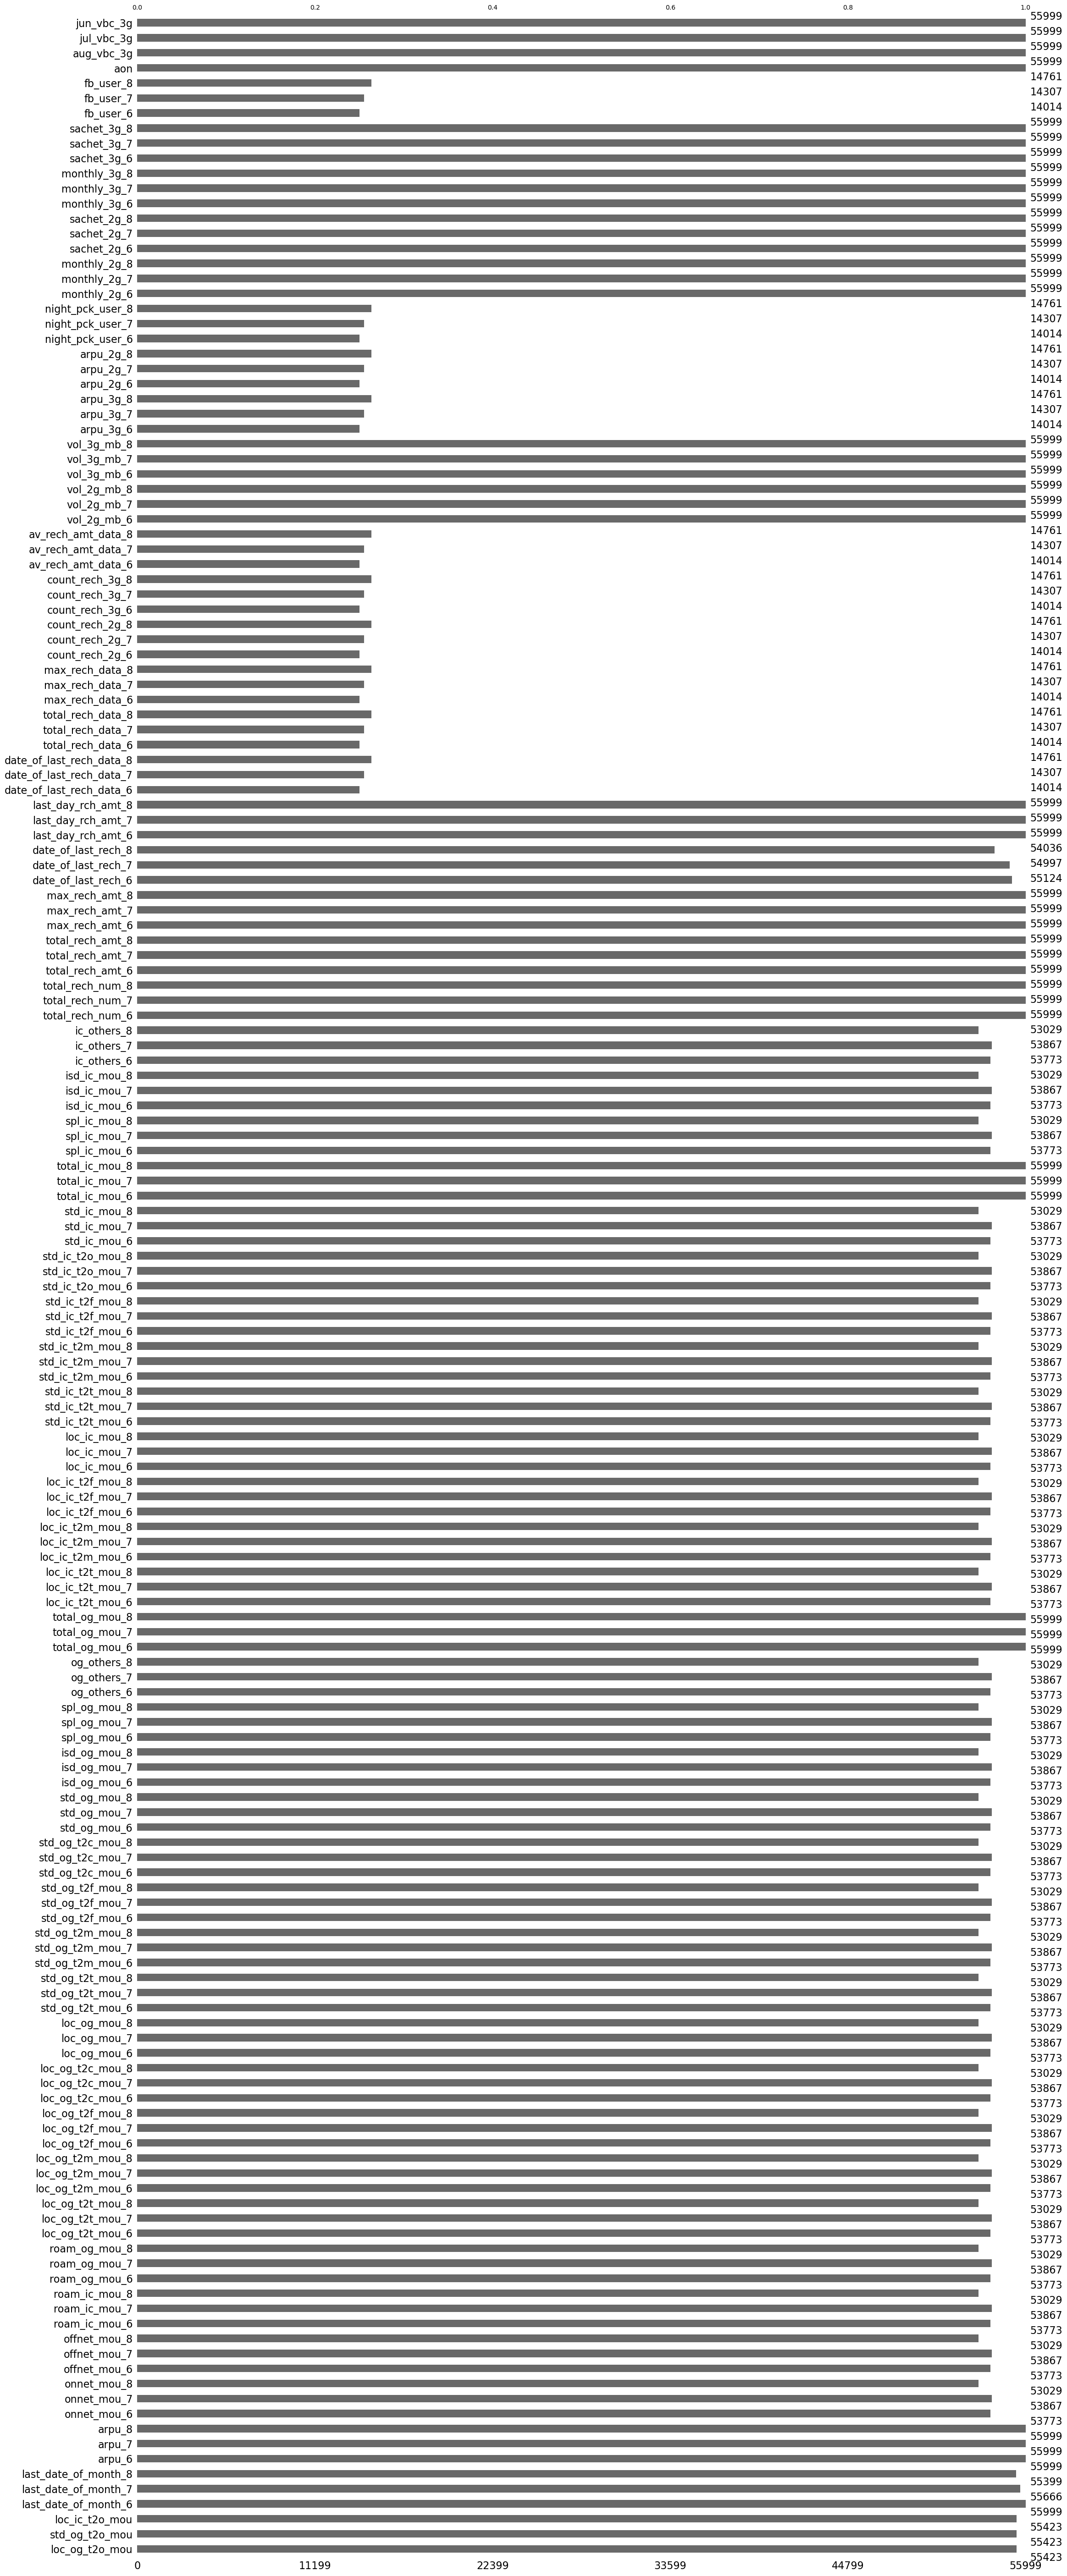

In [11]:
msno.bar(X_train)

<Axes: >

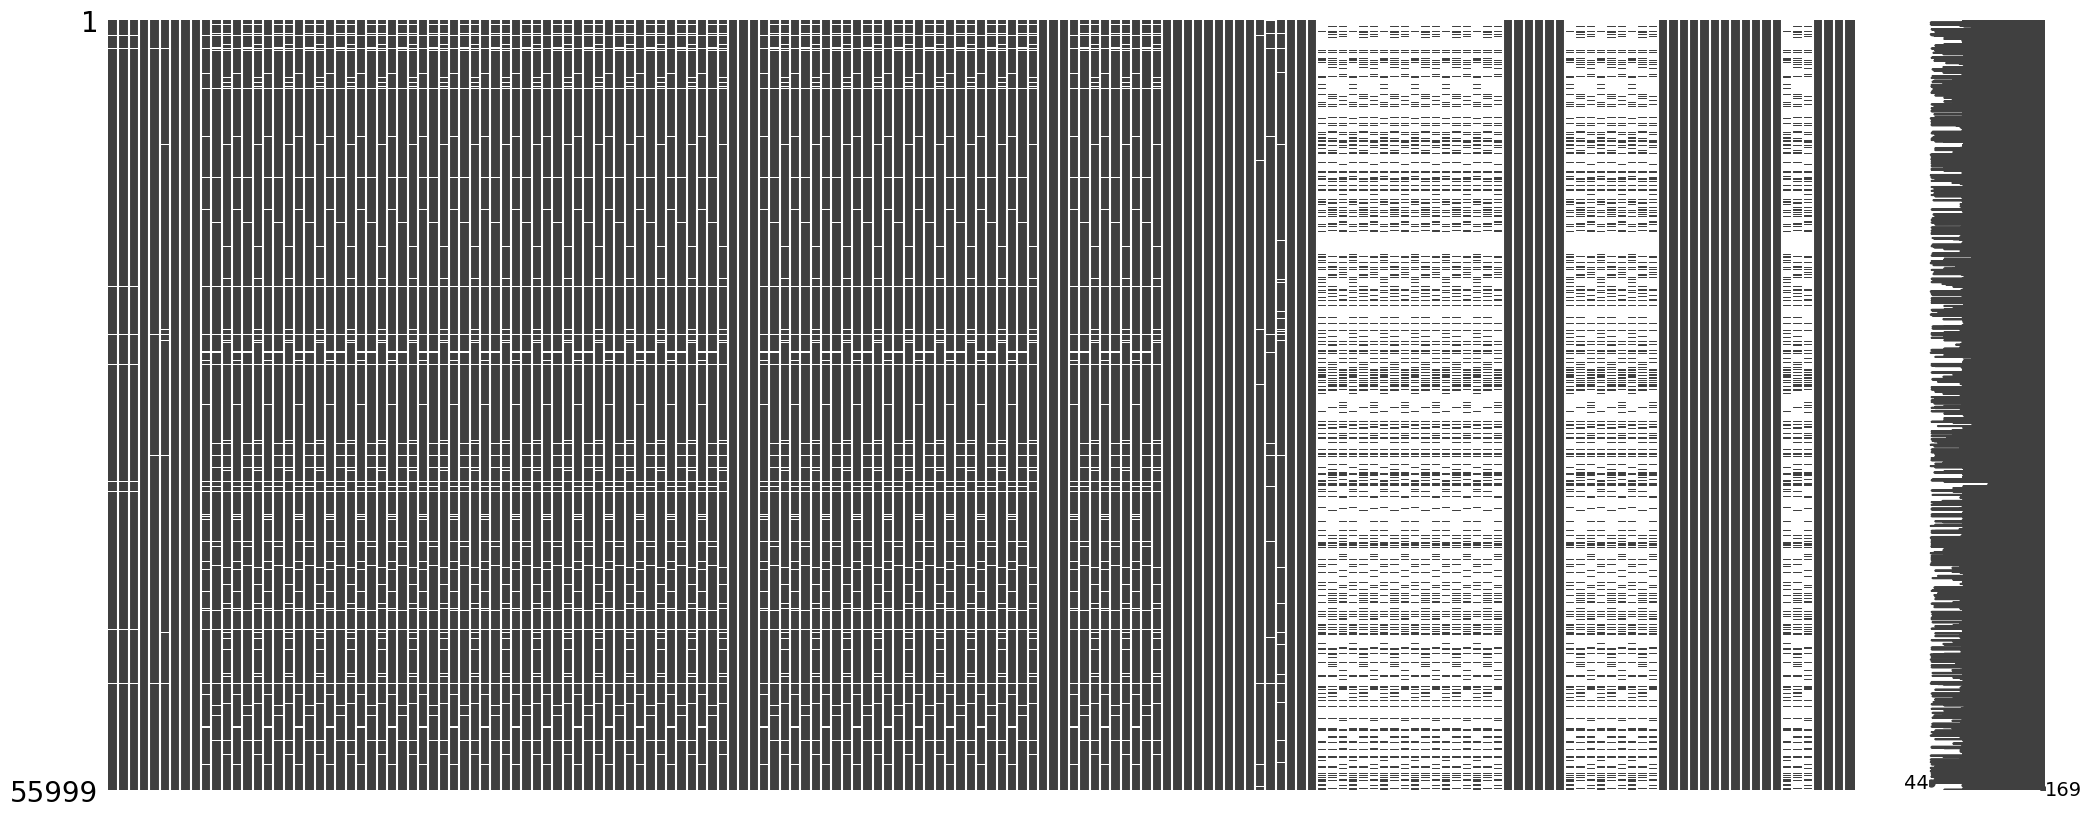

In [12]:
msno.matrix(X_train)

In [13]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent.sort_values(ascending=False)

total_rech_data_6     74.974553
night_pck_user_6      74.974553
arpu_2g_6             74.974553
arpu_3g_6             74.974553
av_rech_amt_data_6    74.974553
                        ...    
vol_3g_mb_7            0.000000
vol_3g_mb_8            0.000000
total_ic_mou_7         0.000000
total_ic_mou_6         0.000000
jun_vbc_3g             0.000000
Length: 169, dtype: float64

In [14]:
new_vars = missing_data_percent[missing_data_percent.le(30)].index
new_vars

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=139)

In [15]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 139)

In [16]:
missing_data_percent = 100*X_train_filtered.isnull().sum()/len(y_train)
missing_data_percent.sort_values(ascending=False)

loc_og_t2c_mou_8        5.303666
og_others_8             5.303666
isd_ic_mou_8            5.303666
loc_og_mou_8            5.303666
loc_og_t2m_mou_8        5.303666
                          ...   
max_rech_amt_7          0.000000
max_rech_amt_8          0.000000
last_date_of_month_6    0.000000
last_day_rch_amt_6      0.000000
jun_vbc_3g              0.000000
Length: 139, dtype: float64

In [17]:
nonunique_features = [feature for feature in X_train_filtered.columns if X_train_filtered[feature].nunique() == 1]
len(nonunique_features)

12

In [18]:
X_train_filtered[nonunique_features].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
id                                                                           
31817             0.0             0.0             0.0            6/30/2014   
41546             0.0             0.0             0.0            6/30/2014   
48379             0.0             0.0             0.0            6/30/2014   
69153             0.0             0.0             0.0            6/30/2014   
59130             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8  std_og_t2c_mou_6  \
id                                                                  
31817            7/31/2014            8/31/2014               0.0   
41546            7/31/2014            8/31/2014               0.0   
48379            7/31/2014            8/31/2014               0.0   
69153            7/31/2014            8/31/2014               0.0   
59130            7/31/2014            8/31/2014               0.0   

       std_og_t2c_mou_7  std_og_t2c_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
id                                                                              
31817               0.0               0.0               0.0               0.0   
41546               0.0               0.0               0.0               0.0   
48379               0.0               0.0               0.0               0.0   
69153               0.0               0.0               0.0               0.0   
59130               0.0               NaN               0.0               0.0   

       std_ic_t2o_mou_8  
id                       
31817               0.0  
41546               0.0  
48379               0.0  
69153               0.0  
59130               NaN

In [19]:
X_train_filtered.drop(nonunique_features, axis=1, inplace=True)

In [20]:
rech_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
X_train_filtered[rech_cols] = X_train_filtered[rech_cols].apply(lambda x: x.fillna(0))

In [21]:
date_cols = X_train_filtered.select_dtypes(include="object").columns
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [22]:
date_of_last_rech = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [23]:
from datetime import date
date_beyond_dataset = date(2014, 12, 30)

In [24]:
def day_counts(df, date_cols, today, new_col_name):   
    df[new_col_name] = (pd.Timestamp(date_beyond_dataset) - df[date_cols].apply(pd.to_datetime).max(axis=1)).dt.days 
    df.drop(date_cols, axis=1, inplace=True)

In [25]:
day_counts(X_train_filtered, date_of_last_rech, date_beyond_dataset, 'days_from_last_recharge')

In [26]:
X_train_filtered[['days_from_last_recharge']].isnull().mean()

days_from_last_recharge    0.000911
dtype: float64

In [27]:
X_train_filtered[['days_from_last_recharge']] = X_train_filtered[['days_from_last_recharge']].fillna(-1)

In [28]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [29]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

<Axes: >

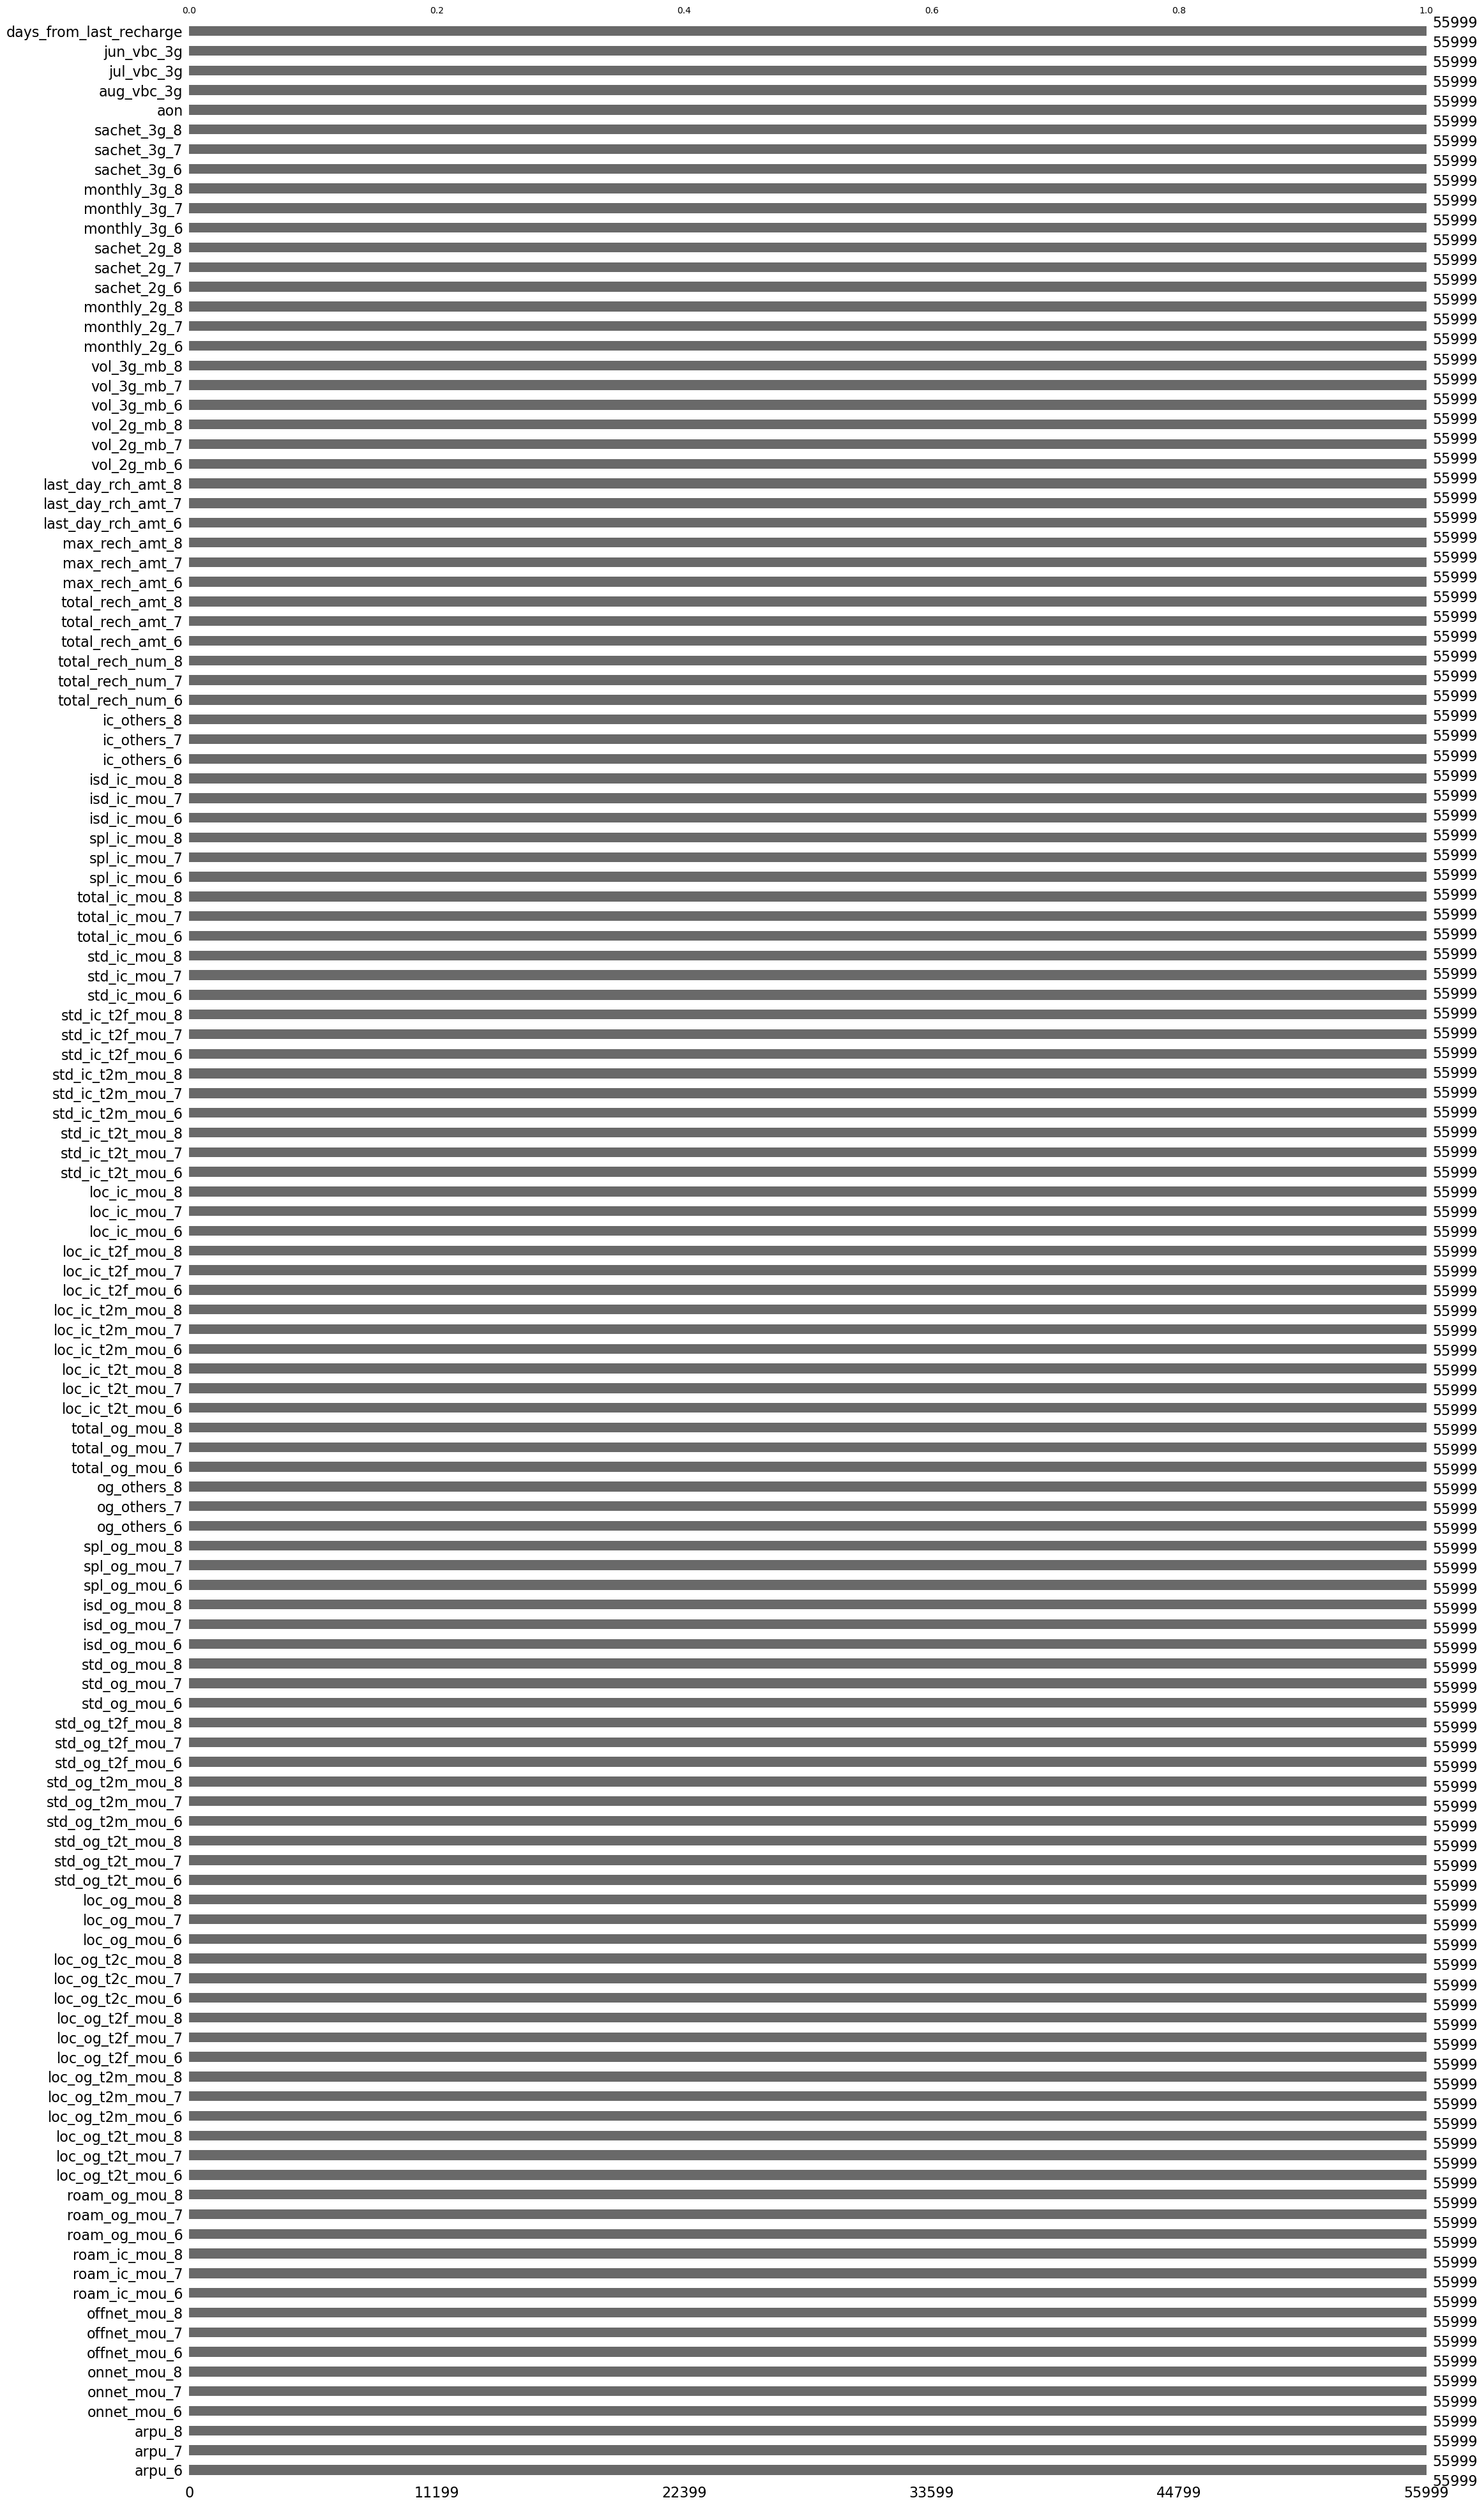

In [30]:
msno.bar(X_train_filtered)

In [31]:
X_train_filtered.isna().mean()

arpu_6                     0.0
arpu_7                     0.0
arpu_8                     0.0
onnet_mou_6                0.0
onnet_mou_7                0.0
                          ... 
aon                        0.0
aug_vbc_3g                 0.0
jul_vbc_3g                 0.0
jun_vbc_3g                 0.0
days_from_last_recharge    0.0
Length: 125, dtype: float64

In [32]:
X_train_filtered.duplicated().sum()

0

In [33]:
X_train_filtered.describe(percentiles=(0.25, 0.50, 0.75, 0.90, 0.95, 0.99))

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  55999.000000  55999.000000  55999.000000  55999.000000  55999.000000   
mean     282.531992    277.588488    278.184547    127.008913    128.315012   
std      338.682892    350.739973    349.777704    293.436099    306.506551   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.684000     84.355000      5.380000      4.940000   
50%      196.645000    191.676000    192.529000     30.610000     29.190000   
75%      369.558500    364.428000    369.872000    112.335000    108.650000   
90%      618.611400    614.455800    614.320800    330.230000    333.230000   
95%      831.079500    817.303700    822.899400    589.862000    604.809000   
99%     1398.528620   1398.199920   1426.742640   1429.060000   1459.272000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  55999.000000  55999.000000  55999.000000  55999.000000   55999.000000   
mean     125.373700    190.552476    188.571874    185.489930       9.169611   
std      304.088106    310.419466    313.280537    316.205848      55.075345   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.080000     28.650000     26.790000     23.860000       0.000000   
50%       27.840000     89.690000     85.490000     83.340000       0.000000   
75%      106.640000    223.370000    218.035000    216.280000       0.000000   
90%      324.042000    466.586000    467.302000    465.764000      10.580000   
95%      593.417000    719.091000    726.643000    711.730000      37.980000   
99%     1441.592800   1521.941800   1507.674600   1478.705800     211.844800   
max    10752.560000   6712.810000   7043.980000  14007.340000    2850.980000   

       ...  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7  \
count  ...  55999.000000  55999.000000  55999.000000  55999.000000   
mean   ...      0.077805      0.083055      0.076859      0.082001   
std    ...      0.380842      0.381842      0.581253      0.635557   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
90%    ...      0.000000      0.000000      0.000000      0.000000   
95%    ...      1.000000      1.000000      0.000000      0.000000   
99%    ...      2.000000      2.000000      2.000000      2.000000   
max    ...     16.000000     10.000000     29.000000     33.000000   

        sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  55999.000000  55999.000000  55999.000000  55999.000000  55999.000000   
mean       0.084734   1225.057447     68.389791     66.449867     59.745292   
std        0.659732    955.290434    272.027369    271.976982    256.315863   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        0.000000    468.000000      0.000000      0.000000      0.000000   
50%        0.000000    871.000000      0.000000      0.000000      0.000000   
75%        0.000000   1824.000000      0.000000      0.000000      0.000000   
90%        0.000000   2800.000000    160.636000    136.828000    107.912000   
95%        0.000000   3109.000000    463.666000    446.088000    398.131000   
99%        2.000000   3651.000000   1220.554400   1255.403600   1189.180600   
max       41.000000   4321.000000  12916.220000   9165.600000  11166.210000   

       days_from_last_recharge  
count             55999.000000  
mean                127.928249  
std                  11.011791  
min                  -1.000000  
25%                 122.000000  
50%                 125.000000  
75%                 128.000000  
90%                 139.000000  
95%             

In [34]:
def outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [35]:
X_train_filtered = X_train_filtered.apply(outliers, axis=0)

In [36]:
X_train_filtered.describe(percentiles=(0.25, 0.50, 0.75, 0.90, 0.95, 0.99))

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  55999.000000  55999.000000  55999.000000  55999.000000  55999.000000   
mean     275.132465    270.272303    270.542834    113.812646    114.684186   
std      263.626503    264.629914    267.232987    206.885172    213.612398   
min     -733.516685   -774.631432   -771.148563      0.000000      0.000000   
25%       93.581000     86.684000     84.355000      5.380000      4.940000   
50%      196.645000    191.676000    192.529000     30.610000     29.190000   
75%      369.558500    364.428000    369.872000    112.335000    108.650000   
90%      618.611400    614.455800    614.320800    330.230000    333.230000   
95%      831.079500    817.303700    822.899400    589.862000    604.809000   
99%     1298.580670   1329.808407   1327.517658   1007.317211   1047.834664   
max     1298.580670   1329.808407   1327.517658   1007.317211   1047.834664   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  55999.000000  55999.000000  55999.000000  55999.000000   55999.000000   
mean     112.028702    178.204900    176.284094    173.704709       6.652830   
std      209.987786    237.822785    239.759986    238.556598      25.812595   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.080000     28.650000     26.790000     23.860000       0.000000   
50%       27.840000     89.690000     85.490000     83.340000       0.000000   
75%      106.640000    223.370000    218.035000    216.280000       0.000000   
90%      324.042000    466.586000    467.302000    465.764000      10.580000   
95%      593.417000    719.091000    726.643000    711.730000      37.980000   
99%     1037.638017   1121.810875   1128.413485   1134.107475     174.395645   
max     1037.638017   1121.810875   1128.413485   1134.107475     174.395645   

       ...  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7  \
count  ...  55999.000000  55999.000000  55999.000000  55999.000000   
mean   ...      0.059663      0.064392      0.052411      0.055381   
std    ...      0.244652      0.253838      0.260705      0.281568   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
90%    ...      0.000000      0.000000      0.000000      0.000000   
95%    ...      1.000000      1.000000      0.000000      0.000000   
99%    ...      1.220332      1.228582      1.820617      1.988674   
max    ...      1.220332      1.228582      1.820617      1.988674   

        sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  55999.000000  55999.000000  55999.000000  55999.000000  55999.000000   
mean       0.056594   1224.997121     55.765935     53.282496     47.259160   
std        0.287585    955.105834    174.626137    171.781902    156.967878   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        0.000000    468.000000      0.000000      0.000000      0.000000   
50%        0.000000    871.000000      0.000000      0.000000      0.000000   
75%        0.000000   1824.000000      0.000000      0.000000      0.000000   
90%        0.000000   2800.000000    160.636000    136.828000    107.912000   
95%        0.000000   3109.000000    463.666000    446.088000    398.131000   
99%        2.000000   3651.000000    884.471899    882.380813    828.692882   
max        2.063930   4090.928751    884.471899    882.380813    828.692882   

       days_from_last_recharge  
count             55999.000000  
mean                127.650695  
std                   8.492347  
min                  94.892876  
25%                 122.000000  
50%                 125.000000  
75%                 128.000000  
90%                 139.000000  
95%             

In [37]:
data_eda = pd.concat([X_train_filtered, y_train], axis=1)
data_eda.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
31817  446.934  360.750  249.623       200.86       141.66       162.74   
41546  335.146  292.392  291.066        11.34         7.54         0.00   
48379  100.014  102.410  130.026        22.66        10.84        30.99   
69153  297.922  283.336  212.446       151.94       277.81       161.69   
59130  167.876  130.436   -5.000         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
id                                                              ...   
31817        213.51        189.44         99.78           0.00  ...   
41546        229.09        177.76        214.49           0.00  ...   
48379        143.76        116.13        142.01           4.29  ...   
69153        149.06        185.34        125.46           0.00  ...   
59130          0.00          0.00          0.00           0.00  ...   

       monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8     aon  \
id                                                                   
31817           0.0          0.0          0.0          0.0   836.0   
41546           0.0          0.0          0.0          0.0  2338.0   
48379           0.0          0.0          0.0          0.0  1249.0   
69153           0.0          0.0          0.0          0.0  1063.0   
59130           0.0          0.0          0.0          0.0   479.0   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  days_from_last_recharge  \
id                                                                   
31817         0.0         0.0         0.0                    123.0   
41546         0.0         0.0         0.0                    123.0   
48379         0.0         0.0         0.0                    128.0   
69153         0.0         0.0         0.0                    144.0   
59130         0.0         0.0         0.0                    124.0   

       churn_probability  
id                        
31817                  0  
41546                  0  
48379                  0  
69153                  0  
59130                  0  

[5 rows x 126 columns]

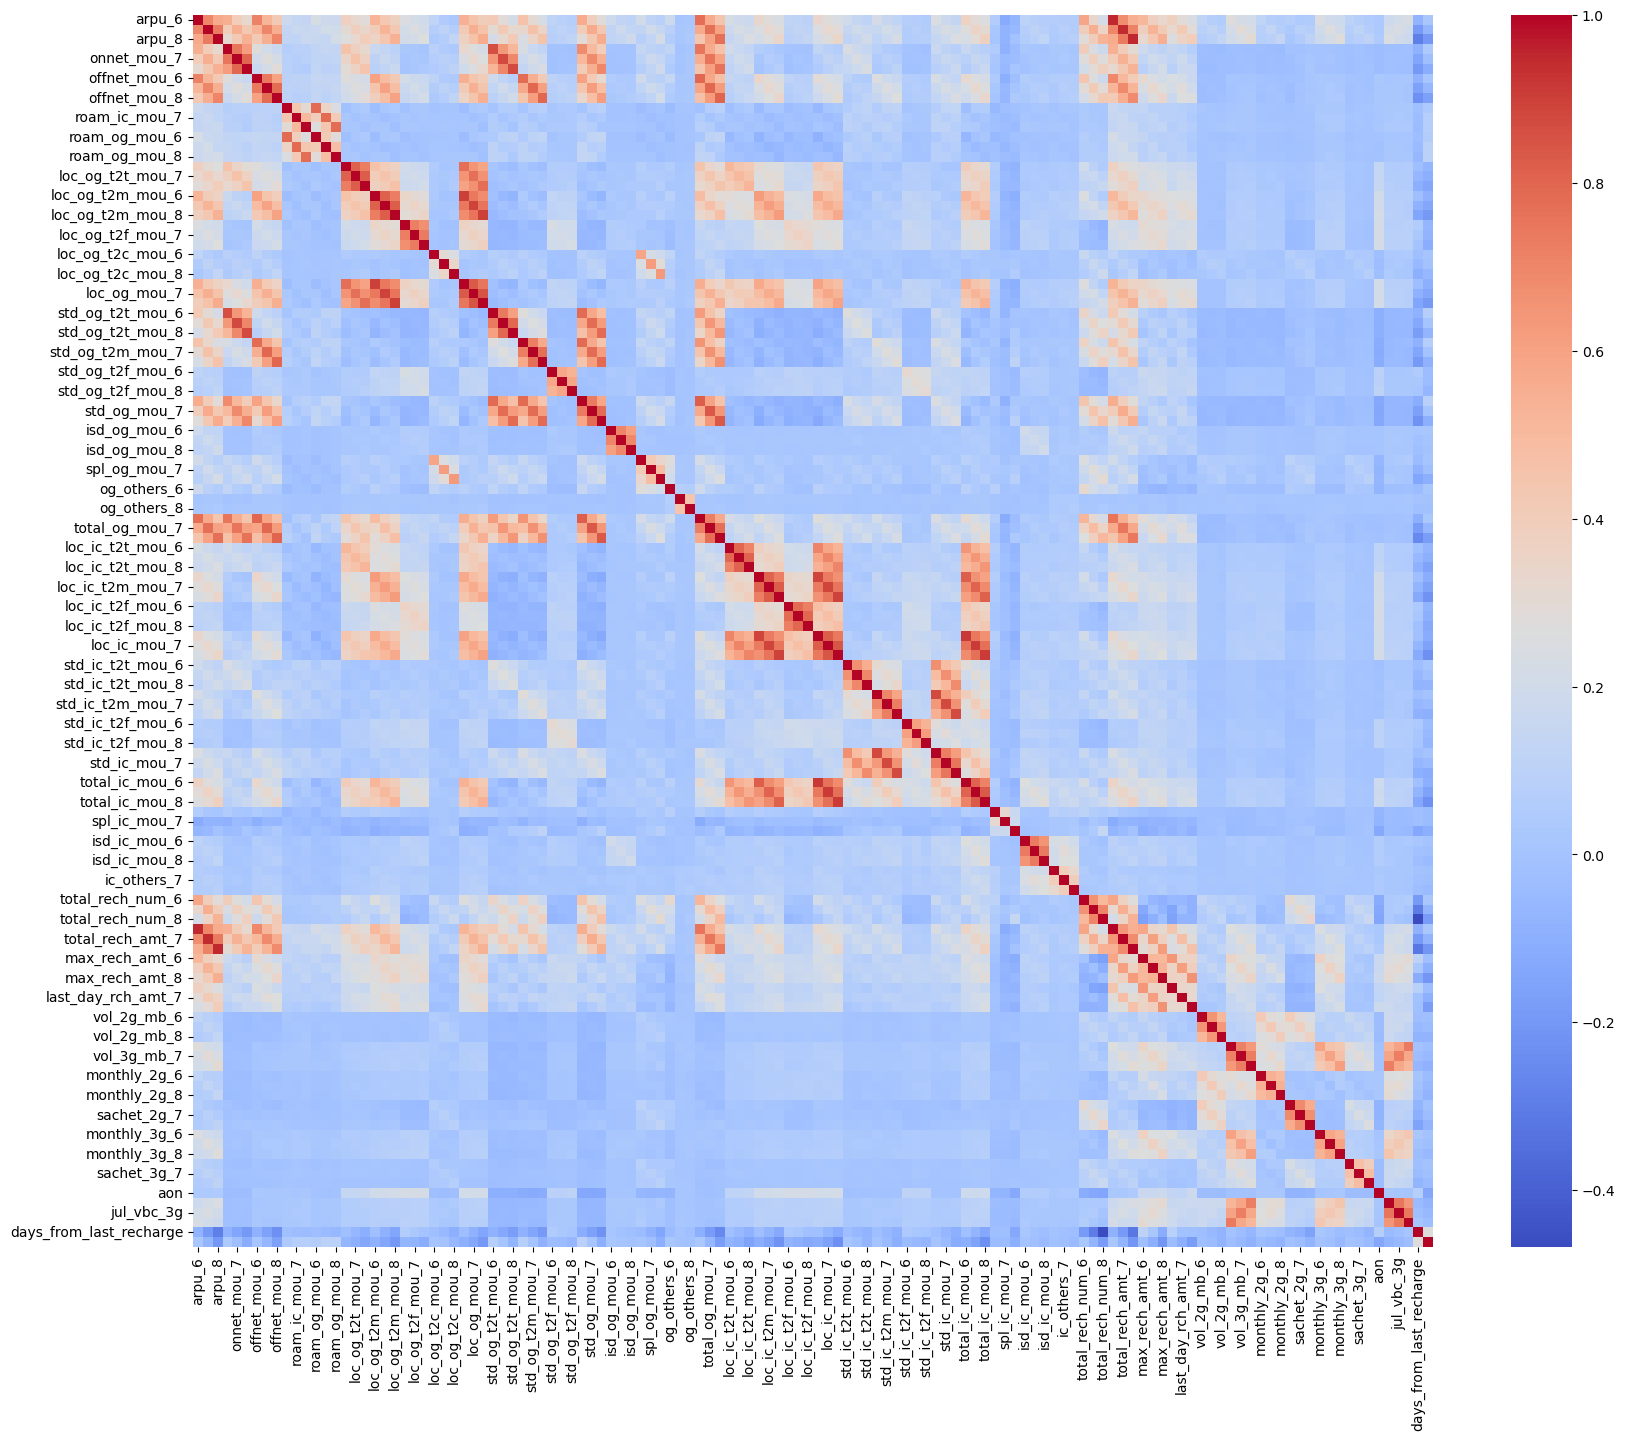

In [38]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_eda.corr(), cmap="coolwarm")
plt.show()

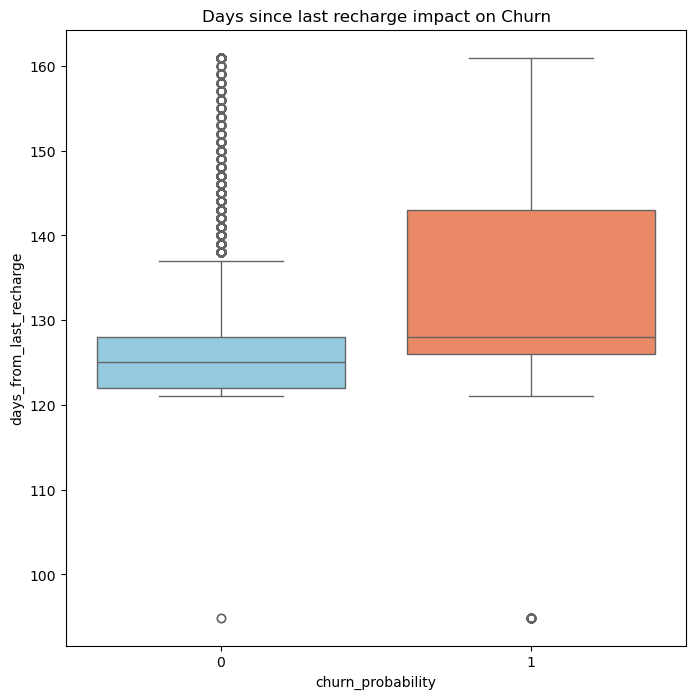

In [39]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=data_eda, x='churn_probability', y='days_from_last_recharge', palette=["skyblue", "coral"])
plt.title("Days since last recharge impact on Churn")
plt.show()

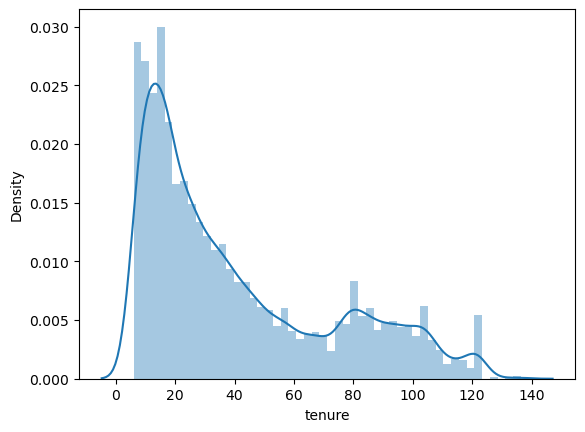

In [40]:
data_eda["tenure"] = data_eda["aon"]/30
sns.distplot(data_eda["tenure"], bins=50)
plt.show()

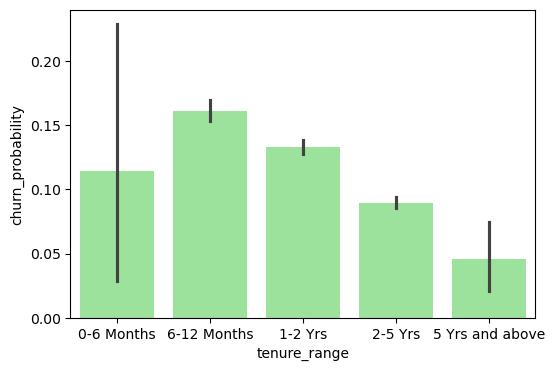

In [41]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_eda['tenure_range'] = pd.cut(data_eda['tenure'], tenure_range, labels=tenure_label)
plt.figure(figsize=[6,4])
sns.barplot(x='tenure_range', y='churn_probability', data=data_eda, color='lightgreen')
plt.show()

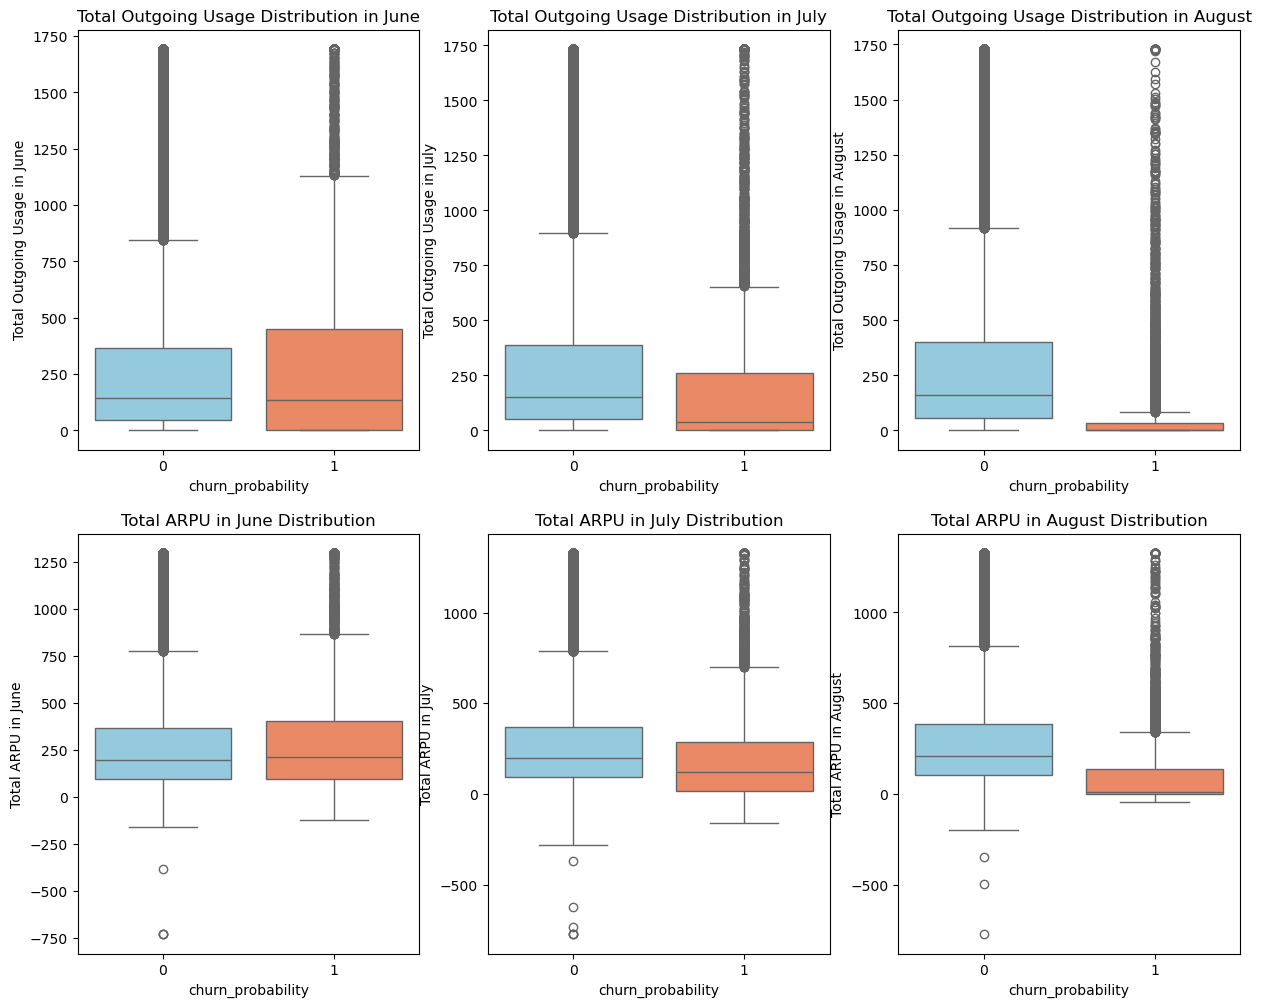

In [42]:
plt.figure(figsize=[15, 12])
plt.subplot(231)
sns.boxplot(x="churn_probability", y='total_og_mou_6', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total Outgoing Usage in June')
plt.title("Total Outgoing Usage Distribution in June")

plt.subplot(232)
sns.boxplot(x="churn_probability", y='total_og_mou_7', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total Outgoing Usage in July')
plt.title("Total Outgoing Usage Distribution in July")

plt.subplot(233)
sns.boxplot(x="churn_probability", y='total_og_mou_8', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total Outgoing Usage in August')
plt.title("Total Outgoing Usage Distribution in August")

plt.subplot(234)
sns.boxplot(x="churn_probability", y='arpu_6', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total ARPU in June')
plt.title("Total ARPU in June Distribution")

plt.subplot(235)
sns.boxplot(x="churn_probability", y='arpu_7', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total ARPU in July')
plt.title("Total ARPU in July Distribution")

plt.subplot(236)
sns.boxplot(x="churn_probability", y='arpu_8', data=data_eda, palette=["skyblue", "coral"])
plt.ylabel('Total ARPU in August')
plt.title("Total ARPU in August Distribution")

plt.show()

In [43]:
pd.DataFrame(X_train_filtered.columns.T)

0
0                     arpu_6
1                     arpu_7
2                     arpu_8
3                onnet_mou_6
4                onnet_mou_7
..                       ...
120                      aon
121               aug_vbc_3g
122               jul_vbc_3g
123               jun_vbc_3g
124  days_from_last_recharge

[125 rows x 1 columns]

In [44]:
X_train_filtered['arpu_diff'] = X_train_filtered.arpu_8 - ((X_train_filtered.arpu_6 + X_train_filtered.arpu_7)/2)

X_train_filtered['onnet_mou_diff'] = X_train_filtered.onnet_mou_8 - ((X_train_filtered.onnet_mou_6 + X_train_filtered.onnet_mou_7)/2)

X_train_filtered['offnet_mou_diff'] = X_train_filtered.offnet_mou_8 - ((X_train_filtered.offnet_mou_6 + X_train_filtered.offnet_mou_7)/2)

X_train_filtered['roam_ic_mou_diff'] = X_train_filtered.roam_ic_mou_8 - ((X_train_filtered.roam_ic_mou_6 + X_train_filtered.roam_ic_mou_7)/2)

X_train_filtered['roam_og_mou_diff'] = X_train_filtered.roam_og_mou_8 - ((X_train_filtered.roam_og_mou_6 + X_train_filtered.roam_og_mou_7)/2)

X_train_filtered['loc_og_mou_diff'] = X_train_filtered.loc_og_mou_8 - ((X_train_filtered.loc_og_mou_6 + X_train_filtered.loc_og_mou_7)/2)

X_train_filtered['std_og_mou_diff'] = X_train_filtered.std_og_mou_8 - ((X_train_filtered.std_og_mou_6 + X_train_filtered.std_og_mou_7)/2)

X_train_filtered['isd_og_mou_diff'] = X_train_filtered.isd_og_mou_8 - ((X_train_filtered.isd_og_mou_6 + X_train_filtered.isd_og_mou_7)/2)

X_train_filtered['spl_og_mou_diff'] = X_train_filtered.spl_og_mou_8 - ((X_train_filtered.spl_og_mou_6 + X_train_filtered.spl_og_mou_7)/2)

X_train_filtered['og_others_diff'] = X_train_filtered.og_others_8 - ((X_train_filtered.og_others_6 + X_train_filtered.og_others_7)/2)

X_train_filtered['total_og_mou_diff'] = X_train_filtered.total_og_mou_8 - ((X_train_filtered.total_og_mou_6 + X_train_filtered.total_og_mou_7)/2)

X_train_filtered['loc_ic_mou_diff'] = X_train_filtered.loc_ic_mou_8 - ((X_train_filtered.loc_ic_mou_6 + X_train_filtered.loc_ic_mou_7)/2)

X_train_filtered['std_ic_mou_diff'] = X_train_filtered.std_ic_mou_8 - ((X_train_filtered.std_ic_mou_6 + X_train_filtered.std_ic_mou_7)/2)

X_train_filtered['isd_ic_mou_diff'] = X_train_filtered.isd_ic_mou_8 - ((X_train_filtered.isd_ic_mou_6 + X_train_filtered.isd_ic_mou_7)/2)

X_train_filtered['spl_ic_mou_diff'] = X_train_filtered.spl_ic_mou_8 - ((X_train_filtered.spl_ic_mou_6 + X_train_filtered.spl_ic_mou_7)/2)

X_train_filtered['ic_others_diff'] = X_train_filtered.ic_others_8 - ((X_train_filtered.ic_others_6 + X_train_filtered.ic_others_7)/2)

X_train_filtered['total_ic_mou_diff'] = X_train_filtered.total_ic_mou_8 - ((X_train_filtered.total_ic_mou_6 + X_train_filtered.total_ic_mou_7)/2)

X_train_filtered['total_rech_num_diff'] = X_train_filtered.total_rech_num_8 - ((X_train_filtered.total_rech_num_6 + X_train_filtered.total_rech_num_7)/2)

X_train_filtered['total_rech_amt_diff'] = X_train_filtered.total_rech_amt_8 - ((X_train_filtered.total_rech_amt_6 + X_train_filtered.total_rech_amt_7)/2)

X_train_filtered['max_rech_amt_diff'] = X_train_filtered.max_rech_amt_8 - ((X_train_filtered.max_rech_amt_6 + X_train_filtered.max_rech_amt_7)/2)

X_train_filtered['vol_2g_mb_diff'] = X_train_filtered.vol_2g_mb_8 - ((X_train_filtered.vol_2g_mb_6 + X_train_filtered.vol_2g_mb_7)/2)

X_train_filtered['vol_3g_mb_diff'] = X_train_filtered.vol_3g_mb_8 - ((X_train_filtered.vol_3g_mb_6 + X_train_filtered.vol_3g_mb_7)/2)


In [45]:
columns_to_del = ['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
                  'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8',
                  'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                  'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
                  'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                  'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                  'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']

In [46]:
X_train_filtered.drop(columns_to_del, axis=1, inplace = True)

In [47]:
pd.DataFrame(X_train_filtered.columns.T)

0
0                 arpu_6
1                 arpu_7
2                 arpu_8
3            onnet_mou_6
4            onnet_mou_7
..                   ...
103  total_rech_num_diff
104  total_rech_amt_diff
105    max_rech_amt_diff
106       vol_2g_mb_diff
107       vol_3g_mb_diff

[108 rows x 1 columns]

In [48]:
final_columns = X_train_filtered.columns
final_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'ic_others_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=108)

In [49]:
derived_cols = ['days_from_last_recharge','arpu_diff','onnet_mou_diff','offnet_mou_diff','roam_ic_mou_diff','roam_og_mou_diff','loc_og_mou_diff',
                'std_og_mou_diff','isd_og_mou_diff','spl_og_mou_diff','og_others_diff','total_og_mou_diff','loc_ic_mou_diff','std_ic_mou_diff',
                'isd_ic_mou_diff','spl_ic_mou_diff','ic_others_diff','total_ic_mou_diff','total_rech_num_diff','total_rech_amt_diff','max_rech_amt_diff',
                'vol_2g_mb_diff','vol_3g_mb_diff']
base_final_cols = final_columns.difference(derived_cols)
base_final_cols

Index(['aon', 'arpu_6', 'arpu_7', 'arpu_8', 'aug_vbc_3g', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'jul_vbc_3g', 'jun_vbc_3g', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_

In [50]:
scale = StandardScaler()
X_train_final_scaled = scale.fit_transform(X_train_filtered)

In [51]:
pd.DataFrame(X_train_final_scaled, columns=final_columns).head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.651691  0.341906 -0.078284     0.420756     0.126285     0.241499   
1  0.227648  0.083588  0.076799    -0.495316    -0.501587    -0.533506   
2 -0.664273 -0.634334 -0.525826    -0.440599    -0.486138    -0.385924   
3  0.086447  0.049366 -0.217403     0.184294     0.763660     0.236498   
4 -0.406854 -0.528427 -1.031105    -0.550130    -0.536885    -0.533506   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0      0.148453      0.054872     -0.309886      -0.257738  ...   
1      0.213964      0.006156      0.170968      -0.257738  ...   
2     -0.144836     -0.250895     -0.132862      -0.091539  ...   
3     -0.122550      0.037771     -0.202238      -0.257738  ...   
4     -0.749325     -0.735259     -0.728155      -0.257738  ...   

   std_ic_mou_diff  isd_ic_mou_diff  spl_ic_mou_diff  ic_others_diff  \
0         0.003937        -0.012877         0.066652       -0.001329   
1         0.012090        -0.012877         0.066652        0.149021   
2         0.126486        -0.012877         0.066652       -0.001329   
3        -2.579516        -0.012877         0.066652        0.144171   
4         0.008076        -0.012877         0.066652       -0.001329   

   total_ic_mou_diff  total_rech_num_diff  total_rech_amt_diff  \
0           1.084193            -0.754199            -0.543451   
1           0.155154             0.292989             0.806257   
2           0.133323             0.816583             0.701503   
3          -0.781374            -0.544762            -1.089377   
4          -0.227171            -0.544762            -0.704610   

   max_rech_amt_diff  vol_2g_mb_diff  vol_3g_mb_diff  
0          -0.166784        0.012634       -0.037024  
1           0.209310        0.012634       -0.037024  
2           1.525639        0.012634       -0.037024  
3          -0.467659        0.012634       -0.037024  
4          -2.247837       -2.851546       -0.037024  

[5 rows x 108 columns]

In [52]:
oversample = SMOTE(random_state=100, sampling_strategy=0.3)

In [53]:
X_train_model1, y_train_model1 = oversample.fit_resample(X_train_final_scaled, y_train)

In [54]:
from collections import Counter
counter = Counter(y_train_model1)
counter

Counter({0: 50316, 1: 15094})

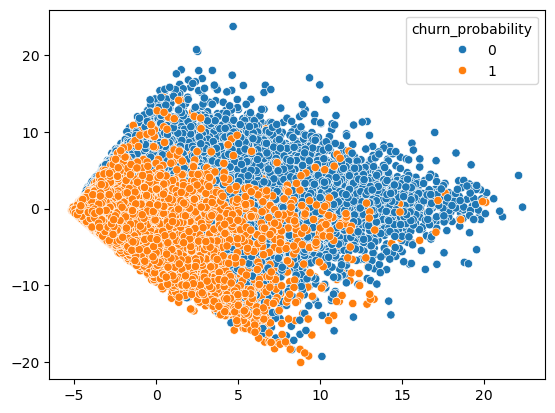

In [55]:
pca = PCA()
pca_components = pca.fit_transform(X_train_model1)
#pca_components = pca.fit_transform(X_train_final_scaled)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train_model1)
#sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

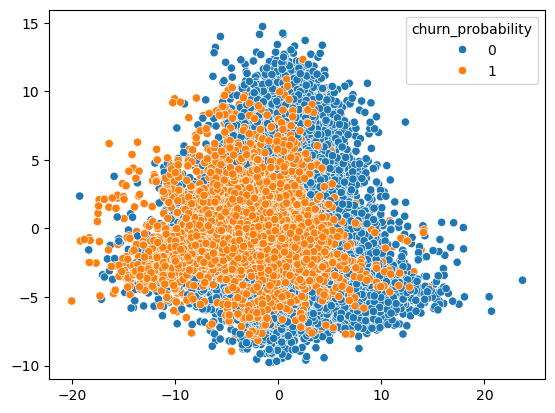

In [56]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train_model1)
#sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [57]:
pca.components_

array([[ 2.02732012e-01,  2.25995459e-01,  2.13283851e-01, ...,
         1.96406694e-02,  1.66796482e-03,  9.17680102e-03],
       [-1.30436217e-01, -2.75020388e-02,  1.37665553e-01, ...,
         1.63795364e-01,  3.85494287e-02,  5.30679105e-02],
       [ 1.69618441e-02, -6.02050999e-03, -1.83623528e-02, ...,
        -2.83505121e-02, -2.92601805e-02, -9.55844879e-03],
       ...,
       [-0.00000000e+00,  4.59119299e-16, -8.82369466e-16, ...,
        -1.07243321e-01,  7.37317272e-02, -1.17474923e-01],
       [ 0.00000000e+00, -7.81694709e-17,  9.03917607e-16, ...,
        -1.10282020e-01, -5.71655309e-02, -1.24610797e-01],
       [-0.00000000e+00, -3.34426934e-16,  7.40903138e-16, ...,
        -3.02976578e-01, -7.44017497e-03, -2.10047139e-02]])

In [58]:
pca.explained_variance_ratio_

array([1.36241520e-01, 9.09245452e-02, 6.34088790e-02, 4.83861523e-02,
       4.02339772e-02, 3.30129828e-02, 3.12032000e-02, 2.76493550e-02,
       2.37552502e-02, 2.27372379e-02, 2.11997461e-02, 1.97235011e-02,
       1.89699213e-02, 1.84365261e-02, 1.67059917e-02, 1.62784347e-02,
       1.57116124e-02, 1.51822906e-02, 1.46158757e-02, 1.41818074e-02,
       1.37427755e-02, 1.32967834e-02, 1.28626014e-02, 1.24129445e-02,
       1.20778995e-02, 1.20005653e-02, 1.13251104e-02, 1.09410344e-02,
       1.06411362e-02, 1.00920598e-02, 9.88489218e-03, 9.59278716e-03,
       9.20222250e-03, 9.02393435e-03, 8.96416399e-03, 7.63583768e-03,
       7.32972249e-03, 7.12254391e-03, 6.33208026e-03, 6.14349514e-03,
       5.76305624e-03, 5.60075720e-03, 5.38874268e-03, 5.25587498e-03,
       4.99215704e-03, 4.72561704e-03, 4.67602979e-03, 4.60796624e-03,
       4.59697973e-03, 4.29958906e-03, 4.22683882e-03, 4.09812748e-03,
       3.64214855e-03, 3.48568907e-03, 3.41686476e-03, 3.32995401e-03,
      

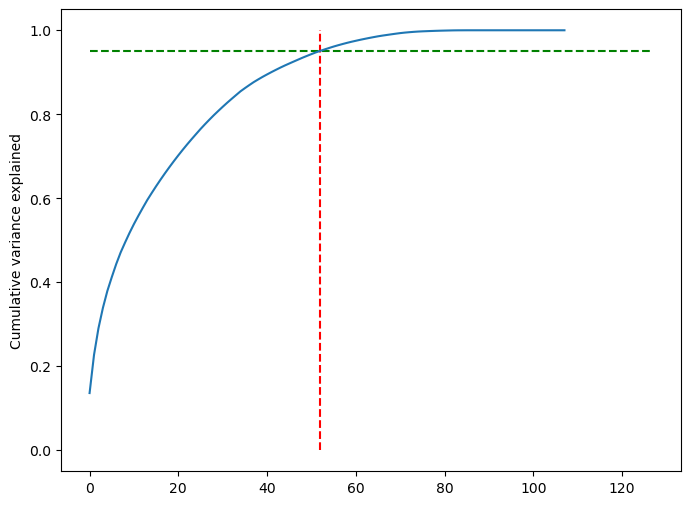

In [59]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[8,6])
plt.vlines(x=52, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=127, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [60]:
pca2 = PCA(n_components=52)
pca_components2 = pca2.fit_transform(X_train_model1)

In [61]:
logreg = LogisticRegression(random_state=55, max_iter=1000, tol=0.001, solver='sag')
lr_model = logreg.fit(pca_components2, y_train_model1)

In [62]:
lr_model.score(pca_components2, y_train_model1)

0.8821281149671304

In [63]:
y_train_pca2_pred = lr_model.predict(pca_components2)

In [64]:
print(classification_report(y_train_model1, y_train_pca2_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     50316
           1       0.77      0.69      0.73     15094

    accuracy                           0.88     65410
   macro avg       0.84      0.82      0.83     65410
weighted avg       0.88      0.88      0.88     65410



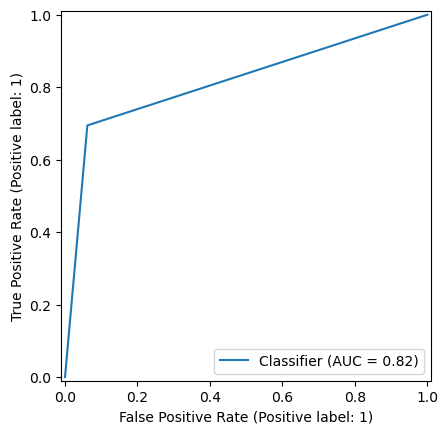

In [65]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_train_model1, y_train_pca2_pred)
plt.show()

In [66]:
confusion_matrix(y_train_model1, y_train_pca2_pred)

array([[47216,  3100],
       [ 4610, 10484]], dtype=int64)

In [67]:
len(pca2.components_)

52

In [68]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=10, n_jobs=-1, oob_score=True)
rf_model1 = rf.fit(X_train_model1, y_train_model1)

In [69]:
feature_importances = pd.DataFrame({'col':final_columns, 'importance':rf.feature_importances_})
feature_importances.sort_values(by="importance", ascending=False)

col  importance
41    total_ic_mou_8    0.095894
35      loc_ic_mou_8    0.095772
32    total_og_mou_8    0.082766
17      loc_og_mou_8    0.059294
56  total_rech_amt_8    0.048515
..               ...         ...
78       sachet_3g_6    0.000218
79       sachet_3g_7    0.000173
69      monthly_2g_6    0.000116
29       og_others_8    0.000049
28       og_others_7    0.000013

[108 rows x 2 columns]

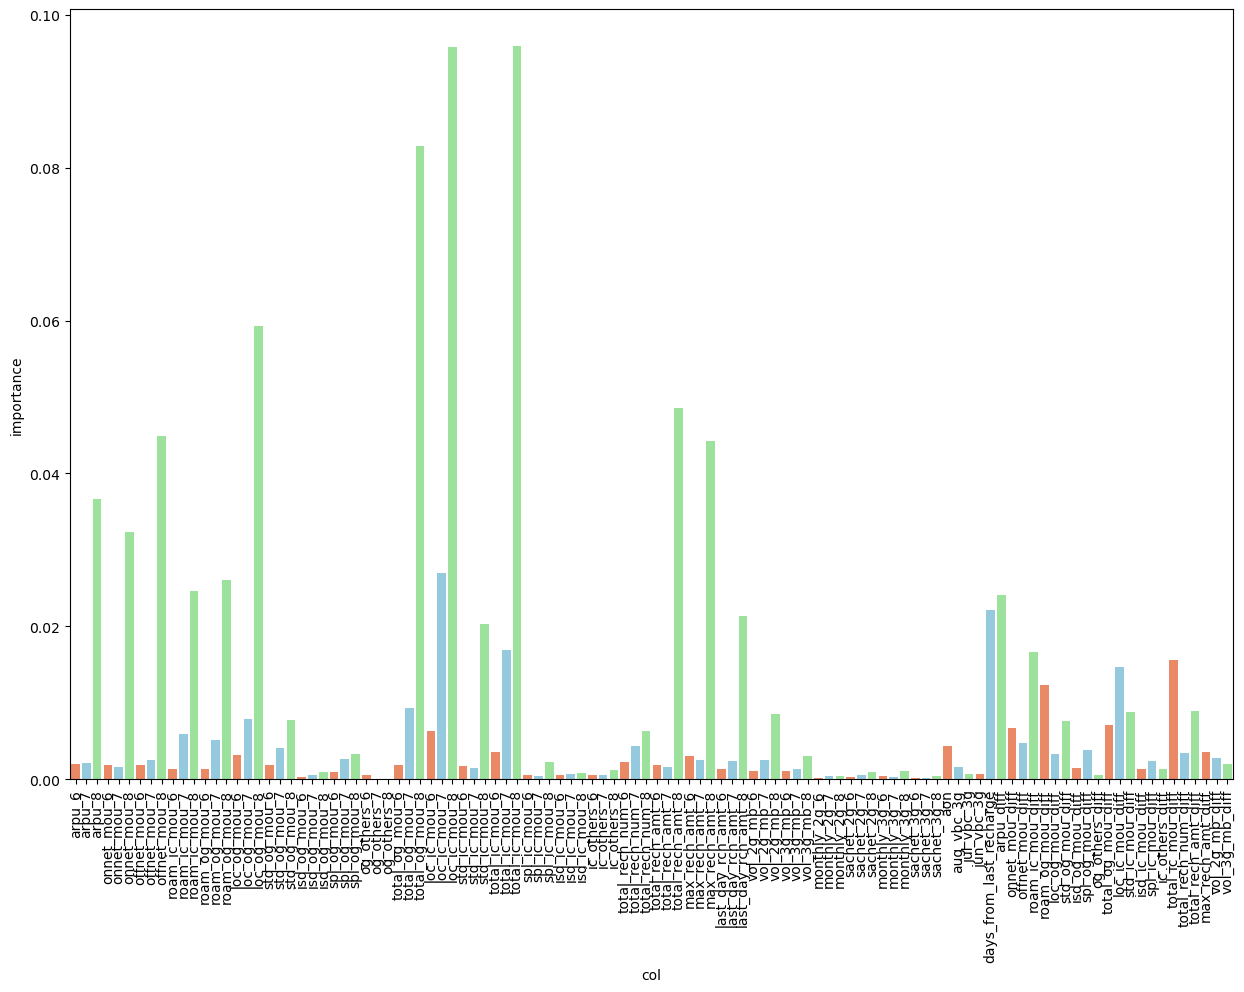

In [70]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x=feature_importances['col'], y=feature_importances['importance'], palette=['coral', 'skyblue', 'lightgreen'])
plt.show()

In [71]:
y_train_rf_predict = rf_model1.predict(X_train_model1)
print(classification_report(y_train_model1, y_train_rf_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     50316
           1       0.90      0.83      0.86     15094

    accuracy                           0.94     65410
   macro avg       0.93      0.90      0.91     65410
weighted avg       0.94      0.94      0.94     65410



In [72]:
rf2 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=7, n_jobs=-1, oob_score=True)
rf_model2 = rf2.fit(pca_components2, y_train_model1)

In [73]:
y_train_rf2_predict = rf_model2.predict(pca_components2)

In [74]:
print(classification_report(y_train_model1, y_train_rf2_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     50316
           1       0.88      0.73      0.80     15094

    accuracy                           0.92     65410
   macro avg       0.90      0.85      0.87     65410
weighted avg       0.91      0.92      0.91     65410



In [151]:
rf_tuned = RandomForestClassifier(random_state=55, n_jobs=-1)
param_grid = {
    "criterion": ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20],
    'n_estimators': [10, 30, 50, 70, 75],
    'max_features' : [4, 7, 8, 10]
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_results = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_grid, cv=folds, n_jobs=-1, n_iter=20, scoring='accuracy', random_state=100)

In [153]:
%%time
cv_results.fit(pca_components2, y_train_model1)

CPU times: total: 1min 29s
Wall time: 11min 42s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=55),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'max_features': [4, 7, 8, 10],
                                        'n_estimators': [10, 30, 50, 70, 75]},
                   random_state=100, scoring='accuracy')

In [155]:
cv_results.best_estimator_

RandomForestClassifier(max_depth=20, max_features=8, n_estimators=70, n_jobs=-1,
                       random_state=55)

In [157]:
cv_results.best_params_

{'n_estimators': 70, 'max_features': 8, 'max_depth': 20, 'criterion': 'gini'}

In [159]:
rf_best = cv_results.best_estimator_

In [161]:
y_pred_rf_tuned = rf_best.predict(pca_components2)

In [163]:
print(classification_report(y_train_model1, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50316
           1       0.99      0.99      0.99     15094

    accuracy                           1.00     65410
   macro avg       0.99      0.99      0.99     65410
weighted avg       1.00      1.00      1.00     65410



In [165]:
%%time
cv_results.fit(X_train_model1, y_train_model1)

CPU times: total: 46.3 s
Wall time: 5min 31s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=55),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'max_features': [4, 7, 8, 10],
                                        'n_estimators': [10, 30, 50, 70, 75]},
                   random_state=100, scoring='accuracy')

In [167]:
cv_results.best_params_

{'n_estimators': 70, 'max_features': 8, 'max_depth': 20, 'criterion': 'gini'}

In [169]:
rf_best2 = cv_results.best_estimator_

In [171]:
y_pred_rf_tuned2 = rf_best2.predict(X_train_model1)
print(classification_report(y_train_model1, y_pred_rf_tuned2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50316
           1       0.96      0.99      0.97     15094

    accuracy                           0.99     65410
   macro avg       0.98      0.99      0.98     65410
weighted avg       0.99      0.99      0.99     65410



In [173]:
logreg2 = LogisticRegression(random_state=55, max_iter=1000, tol=0.001, solver='sag')

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

params={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
        'penalty': ['l1', 'l2']
       }
cv_results_lr = RandomizedSearchCV(estimator=logreg2, param_distributions=params, cv=folds, n_jobs=-1, n_iter=30, scoring='accuracy', random_state=100)


In [175]:
%%time
cv_results_lr.fit(pca_components2, y_train_model1)

CPU times: total: 2.16 s
Wall time: 16.6 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=LogisticRegression(max_iter=1000, random_state=55,
                                                solver='sag', tol=0.001),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                                        'penalty': ['l1', 'l2']},
                   random_state=100, scoring='accuracy')

In [177]:
cv_results_lr.best_params_

{'penalty': 'l2', 'C': 1}

In [179]:
cv_results_lr.best_estimator_

LogisticRegression(C=1, max_iter=1000, random_state=55, solver='sag', tol=0.001)

In [181]:
lr_best = cv_results_lr.best_estimator_
y_pred_lr_tuned = lr_best.predict(pca_components2)
print(classification_report(y_train_model1, y_pred_lr_tuned))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     50316
           1       0.77      0.69      0.73     15094

    accuracy                           0.88     65410
   macro avg       0.84      0.82      0.83     65410
weighted avg       0.88      0.88      0.88     65410



In [183]:
xgb = XGBClassifier(objective='binary:logistic', scale_pos_weight=1, learning_rate=0.01, max_depth=10, reg_lambda=0.2, max_features=10)

In [185]:
xgb_model = xgb.fit(X_train_model1, y_train_model1)


In [187]:
y_train_xgb_predict = xgb_model.predict(X_train_model1)

In [189]:
print(classification_report(y_train_model1, y_train_xgb_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     50316
           1       0.93      0.84      0.88     15094

    accuracy                           0.95     65410
   macro avg       0.94      0.91      0.93     65410
weighted avg       0.95      0.95      0.95     65410



In [191]:
feature_importances_xgb = pd.DataFrame({'col':final_columns, 'importance':xgb.feature_importances_})
feature_importances_xgb.sort_values(by="importance", ascending=False)

col  importance
41      total_ic_mou_8    0.456353
14       roam_og_mou_8    0.122859
56    total_rech_amt_8    0.019972
65         vol_2g_mb_8    0.018836
62  last_day_rch_amt_8    0.015000
..                 ...         ...
83          jul_vbc_3g    0.001621
78         sachet_3g_6    0.001354
71        monthly_2g_8    0.000959
29         og_others_8    0.000917
28         og_others_7    0.000000

[108 rows x 2 columns]

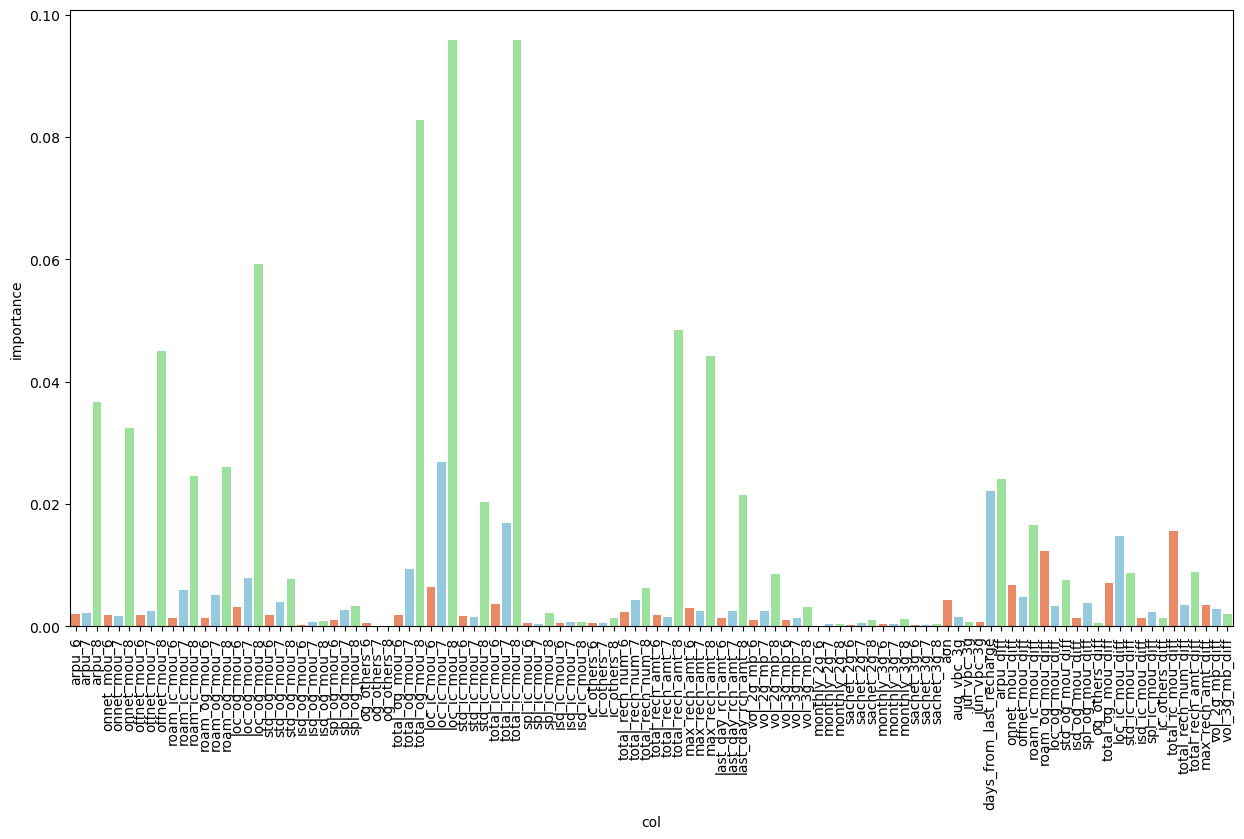

In [193]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=feature_importances_xgb['col'], y=feature_importances['importance'], palette=['coral', 'skyblue', 'lightgreen'])
plt.show()

In [195]:
top_features = feature_importances.sort_values(by="importance", ascending=False)
top_features = top_features.reset_index().loc[:29, 'col']
top_features

0              total_ic_mou_8
1                loc_ic_mou_8
2              total_og_mou_8
3                loc_og_mou_8
4            total_rech_amt_8
5                offnet_mou_8
6              max_rech_amt_8
7                      arpu_8
8                 onnet_mou_8
9                loc_ic_mou_7
10              roam_og_mou_8
11              roam_ic_mou_8
12                  arpu_diff
13    days_from_last_recharge
14         last_day_rch_amt_8
15               std_ic_mou_8
16             total_ic_mou_7
17           roam_ic_mou_diff
18          total_ic_mou_diff
19            loc_ic_mou_diff
20           roam_og_mou_diff
21             total_og_mou_7
22        total_rech_amt_diff
23            std_ic_mou_diff
24                vol_2g_mb_8
25               loc_og_mou_7
26               std_og_mou_8
27            std_og_mou_diff
28          total_og_mou_diff
29             onnet_mou_diff
Name: col, dtype: object

In [197]:
X_train_model1_df = pd.DataFrame(X_train_model1, columns=final_columns)
X_train_model1_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.651691  0.341906 -0.078284     0.420756     0.126285     0.241499   
1  0.227648  0.083588  0.076799    -0.495316    -0.501587    -0.533506   
2 -0.664273 -0.634334 -0.525826    -0.440599    -0.486138    -0.385924   
3  0.086447  0.049366 -0.217403     0.184294     0.763660     0.236498   
4 -0.406854 -0.528427 -1.031105    -0.550130    -0.536885    -0.533506   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0      0.148453      0.054872     -0.309886      -0.257738  ...   
1      0.213964      0.006156      0.170968      -0.257738  ...   
2     -0.144836     -0.250895     -0.132862      -0.091539  ...   
3     -0.122550      0.037771     -0.202238      -0.257738  ...   
4     -0.749325     -0.735259     -0.728155      -0.257738  ...   

   std_ic_mou_diff  isd_ic_mou_diff  spl_ic_mou_diff  ic_others_diff  \
0         0.003937        -0.012877         0.066652       -0.001329   
1         0.012090        -0.012877         0.066652        0.149021   
2         0.126486        -0.012877         0.066652       -0.001329   
3        -2.579516        -0.012877         0.066652        0.144171   
4         0.008076        -0.012877         0.066652       -0.001329   

   total_ic_mou_diff  total_rech_num_diff  total_rech_amt_diff  \
0           1.084193            -0.754199            -0.543451   
1           0.155154             0.292989             0.806257   
2           0.133323             0.816583             0.701503   
3          -0.781374            -0.544762            -1.089377   
4          -0.227171            -0.544762            -0.704610   

   max_rech_amt_diff  vol_2g_mb_diff  vol_3g_mb_diff  
0          -0.166784        0.012634       -0.037024  
1           0.209310        0.012634       -0.037024  
2           1.525639        0.012634       -0.037024  
3          -0.467659        0.012634       -0.037024  
4          -2.247837       -2.851546       -0.037024  

[5 rows x 108 columns]

In [199]:
X_train_refined = X_train_model1_df[top_features]
X_train_refined.head()

total_ic_mou_8  loc_ic_mou_8  total_og_mou_8  loc_og_mou_8  \
0        1.224218      1.675938       -0.064666      0.789696   
1       -0.144720      0.006368       -0.190665      0.504178   
2       -0.045023      0.122291       -0.299379      0.260362   
3        0.282108     -0.349356       -0.000066     -0.249120   
4       -0.849372     -0.809421       -0.753227     -0.707944   

   total_rech_amt_8  offnet_mou_8  max_rech_amt_8    arpu_8  onnet_mou_8  \
0         -0.016630     -0.309886       -0.766497 -0.078284     0.241499   
1          0.538560      0.170968        0.422217  0.076799    -0.533506   
2         -0.050748     -0.132862        1.527514 -0.525826    -0.385924   
3         -0.571821     -0.202238        0.276235 -0.217403     0.236498   
4         -0.975032     -0.728155       -1.079317 -1.031105    -0.533506   

   loc_ic_mou_7  ...  roam_og_mou_diff  total_og_mou_7  total_rech_amt_diff  \
0      1.166734  ...          0.060005        0.099568            -0.543451   
1     -0.361225  ...          0.060005       -0.276926             0.806257   
2     -0.042499  ...          0.025673       -0.430824             0.701503   
3     -0.347952  ...          0.060005        0.442674            -1.089377   
4     -0.690763  ...          0.060005       -0.760756            -0.704610   

   std_ic_mou_diff  vol_2g_mb_8  loc_og_mou_7  std_og_mou_8  std_og_mou_diff  \
0         0.003937    -0.308171      1.163287     -0.493803         0.003094   
1         0.012090    -0.308171      0.330232     -0.487131         0.006750   
2         0.126486    -0.308171      0.005118     -0.482983         0.015629   
3        -2.579516    -0.308171      0.270668      0.192353        -0.100811   
4         0.008076    -0.308171     -0.711469     -0.493803         0.003094   

   total_og_mou_diff  onnet_mou_diff  
0          -0.389619       -0.044341  
1           0.018075       -0.050816  
2           0.113812        0.115842  
3          -0.333652       -0.358691  
4           0.013811        0.015622  

[5 rows x 30 columns]

In [201]:
rf30 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=10, n_jobs=-1, oob_score=True)

X_train_refined_array = np.array(X_train_refined)
rf30_model = rf30.fit(X_train_refined_array, y_train_model1)

In [203]:
y_train_rf30_pred = rf30_model.predict(X_train_refined_array)
print(classification_report(y_train_model1, y_train_rf30_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     50316
           1       0.90      0.85      0.87     15094

    accuracy                           0.94     65410
   macro avg       0.93      0.91      0.92     65410
weighted avg       0.94      0.94      0.94     65410



In [205]:
rf30_tuned = RandomForestClassifier(random_state=55, n_jobs=-1)
param_grid = {
    "criterion": ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20],
    'n_estimators': [10, 30, 50, 70, 75],
    'max_features' : [4, 7, 8, 10]
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
rf30_search = RandomizedSearchCV(estimator=rf30_tuned, param_distributions=param_grid, cv=folds, n_jobs=-1, n_iter=20, scoring='accuracy', random_state=100)

In [207]:
rf30_search.fit(X_train_refined_array, y_train_model1)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=55),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'max_features': [4, 7, 8, 10],
                                        'n_estimators': [10, 30, 50, 70, 75]},
                   random_state=100, scoring='accuracy')

In [209]:
rf30_search.best_params_

{'n_estimators': 70, 'max_features': 8, 'max_depth': 20, 'criterion': 'gini'}

In [211]:
rf30_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=8, n_estimators=70, n_jobs=-1,
                       random_state=55)

In [213]:
rf30_model_tuned = rf30_search.best_estimator_

In [215]:
y_train_rf30_pred = rf30_model_tuned.predict(X_train_refined_array)
print(classification_report(y_train_model1, y_train_rf30_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     50316
           1       0.97      0.98      0.97     15094

    accuracy                           0.99     65410
   macro avg       0.98      0.98      0.98     65410
weighted avg       0.99      0.99      0.99     65410



In [217]:
xgb_30 = XGBClassifier(objective='binary:logistic', scale_pos_weight=1, learning_rate=0.01, max_depth=10, reg_lambda=0.2, max_features=10)
xgb_model_30 = xgb_30.fit(X_train_refined_array, y_train_model1)
y_train_xgb30_pred = xgb_model_30.predict(X_train_refined_array)
print(classification_report(y_train_model1, y_train_xgb30_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     50316
           1       0.92      0.81      0.86     15094

    accuracy                           0.94     65410
   macro avg       0.93      0.90      0.91     65410
weighted avg       0.94      0.94      0.94     65410



In [219]:
from sklearn.svm import SVC

svc1 = SVC(kernel="rbf", random_state = 100, C=100, gamma=0.01)

In [221]:
svc_model = svc1.fit(X_train_refined_array, y_train_model1) 

In [223]:
y_train_svc1_pred = svc_model.predict(X_train_refined_array)
print(classification_report(y_train_model1, y_train_svc1_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     50316
           1       0.83      0.82      0.82     15094

    accuracy                           0.92     65410
   macro avg       0.89      0.89      0.89     65410
weighted avg       0.92      0.92      0.92     65410



In [225]:
# Test Data Preparation
X_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
id                                                                           
21594             0.0             0.0             0.0            6/30/2014   
27769             0.0             0.0             0.0            6/30/2014   
29893             0.0             0.0             0.0            6/30/2014   
4468              0.0             0.0             0.0            6/30/2014   
48584             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  \
id                                                                           
21594            7/31/2014            8/31/2014  112.162  155.757   51.025   
27769            7/31/2014            8/31/2014  316.662  355.309  270.304   
29893            7/31/2014            8/31/2014  316.121  279.172  241.183   
4468             7/31/2014            8/31/2014  144.929   99.518   13.879   
48584            7/31/2014            8/31/2014   25.411   14.362  420.734   

       onnet_mou_6  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  \
id                  ...                                                     
21594       816.58  ...            0            0            0        NaN   
27769         6.09  ...            0            0            0        NaN   
29893        19.99  ...            0            0            0        NaN   
4468          0.00  ...            0            0            0        1.0   
48584         7.88  ...            0            0            0        NaN   

       fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
id                                                                     
21594        NaN        NaN   300        0.00        0.00        0.00  
27769        NaN        NaN   919        0.00        0.00        0.00  
29893        NaN        NaN  1309        0.00        0.00        0.00  
4468         1.0        1.0   457       82.59      559.63      249.47  
48584        NaN        NaN   706        0.00        0.00        0.00  

[5 rows x 169 columns]

In [227]:
X_test.shape

(14000, 169)

In [231]:
X_test_filtered = X_test[new_vars]
X_test_filtered.drop(nonunique_features, axis=1, inplace=True)
X_test_filtered[rech_cols] = X_test_filtered[rech_cols].apply(lambda x: x.fillna(0))
day_counts(X_test_filtered, date_of_last_rech, date_beyond_dataset, 'days_from_last_recharge')
X_test_filtered[['days_from_last_recharge']] = X_test_filtered[['days_from_last_recharge']].fillna(-1)


X_test_filtered[impute_cols] = imp.transform(X_test_filtered[impute_cols])


X_test_filtered = X_test_filtered.apply(outliers, axis=0)


X_test_filtered['arpu_diff'] = X_test_filtered.arpu_8 - ((X_test_filtered.arpu_6 + X_test_filtered.arpu_7)/2)

X_test_filtered['onnet_mou_diff'] = X_test_filtered.onnet_mou_8 - ((X_test_filtered.onnet_mou_6 + X_test_filtered.onnet_mou_7)/2)

X_test_filtered['offnet_mou_diff'] = X_test_filtered.offnet_mou_8 - ((X_test_filtered.offnet_mou_6 + X_test_filtered.offnet_mou_7)/2)

X_test_filtered['roam_ic_mou_diff'] = X_test_filtered.roam_ic_mou_8 - ((X_test_filtered.roam_ic_mou_6 + X_test_filtered.roam_ic_mou_7)/2)

X_test_filtered['roam_og_mou_diff'] = X_test_filtered.roam_og_mou_8 - ((X_test_filtered.roam_og_mou_6 + X_test_filtered.roam_og_mou_7)/2)

X_test_filtered['loc_og_mou_diff'] = X_test_filtered.loc_og_mou_8 - ((X_test_filtered.loc_og_mou_6 + X_test_filtered.loc_og_mou_7)/2)

X_test_filtered['std_og_mou_diff'] = X_test_filtered.std_og_mou_8 - ((X_test_filtered.std_og_mou_6 + X_test_filtered.std_og_mou_7)/2)

X_test_filtered['isd_og_mou_diff'] = X_test_filtered.isd_og_mou_8 - ((X_test_filtered.isd_og_mou_6 + X_test_filtered.isd_og_mou_7)/2)

X_test_filtered['spl_og_mou_diff'] = X_test_filtered.spl_og_mou_8 - ((X_test_filtered.spl_og_mou_6 + X_test_filtered.spl_og_mou_7)/2)

X_test_filtered['og_others_diff'] = X_test_filtered.og_others_8 - ((X_test_filtered.og_others_6 + X_test_filtered.og_others_7)/2)

X_test_filtered['total_og_mou_diff'] = X_test_filtered.total_og_mou_8 - ((X_test_filtered.total_og_mou_6 + X_test_filtered.total_og_mou_7)/2)

X_test_filtered['loc_ic_mou_diff'] = X_test_filtered.loc_ic_mou_8 - ((X_test_filtered.loc_ic_mou_6 + X_test_filtered.loc_ic_mou_7)/2)

X_test_filtered['std_ic_mou_diff'] = X_test_filtered.std_ic_mou_8 - ((X_test_filtered.std_ic_mou_6 + X_test_filtered.std_ic_mou_7)/2)

X_test_filtered['isd_ic_mou_diff'] = X_test_filtered.isd_ic_mou_8 - ((X_test_filtered.isd_ic_mou_6 + X_test_filtered.isd_ic_mou_7)/2)

X_test_filtered['spl_ic_mou_diff'] = X_test_filtered.spl_ic_mou_8 - ((X_test_filtered.spl_ic_mou_6 + X_test_filtered.spl_ic_mou_7)/2)

X_test_filtered['ic_others_diff'] = X_test_filtered.ic_others_8 - ((X_test_filtered.ic_others_6 + X_test_filtered.ic_others_7)/2)

X_test_filtered['total_ic_mou_diff'] = X_test_filtered.total_ic_mou_8 - ((X_test_filtered.total_ic_mou_6 + X_test_filtered.total_ic_mou_7)/2)

X_test_filtered['total_rech_num_diff'] = X_test_filtered.total_rech_num_8 - ((X_test_filtered.total_rech_num_6 + X_test_filtered.total_rech_num_7)/2)

X_test_filtered['total_rech_amt_diff'] = X_test_filtered.total_rech_amt_8 - ((X_test_filtered.total_rech_amt_6 + X_test_filtered.total_rech_amt_7)/2)

X_test_filtered['max_rech_amt_diff'] = X_test_filtered.max_rech_amt_8 - ((X_test_filtered.max_rech_amt_6 + X_test_filtered.max_rech_amt_7)/2)

X_test_filtered['vol_2g_mb_diff'] = X_test_filtered.vol_2g_mb_8 - ((X_test_filtered.vol_2g_mb_6 + X_test_filtered.vol_2g_mb_7)/2)

X_test_filtered['vol_3g_mb_diff'] = X_test_filtered.vol_3g_mb_8 - ((X_test_filtered.vol_3g_mb_6 + X_test_filtered.vol_3g_mb_7)/2)

X_test_filtered.drop(columns_to_del, axis=1, inplace = True)


X_test_final_scaled = scale.transform(X_test_filtered)


test_pca_components = pca2.transform(X_test_final_scaled)

In [233]:
y_test_lr1_pred = lr_model.predict(test_pca_components)
print(classification_report(y_test, y_test_lr1_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12551
           1       0.54      0.67      0.60      1449

    accuracy                           0.91     14000
   macro avg       0.75      0.80      0.77     14000
weighted avg       0.92      0.91      0.91     14000



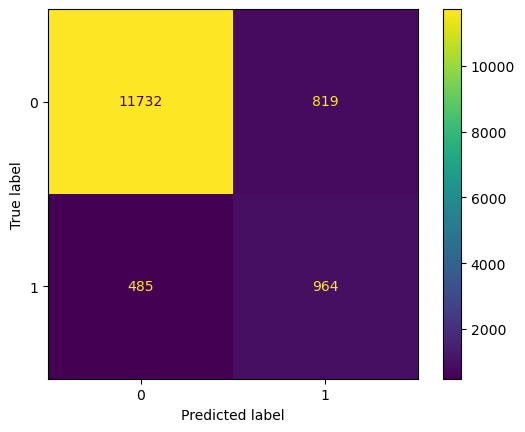

In [235]:
cm1 = confusion_matrix(y_test, y_test_lr1_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=lr_model.classes_)
disp1.plot()
plt.show()

In [237]:
y_test_rf_pred = rf_model1.predict(X_test_final_scaled)
print(classification_report(y_test, y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     12551
           1       0.70      0.68      0.69      1449

    accuracy                           0.94     14000
   macro avg       0.83      0.82      0.83     14000
weighted avg       0.94      0.94      0.94     14000



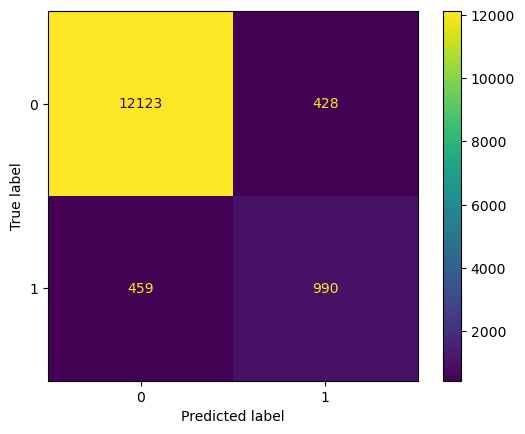

In [239]:
cm2 = confusion_matrix(y_test, y_test_rf_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=rf_model1.classes_)
disp2.plot()
plt.show()

In [241]:
y_test_rf2_pred = rf_model2.predict(test_pca_components)
print(classification_report(y_test, y_test_rf2_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12551
           1       0.61      0.53      0.56      1449

    accuracy                           0.92     14000
   macro avg       0.78      0.74      0.76     14000
weighted avg       0.91      0.92      0.91     14000



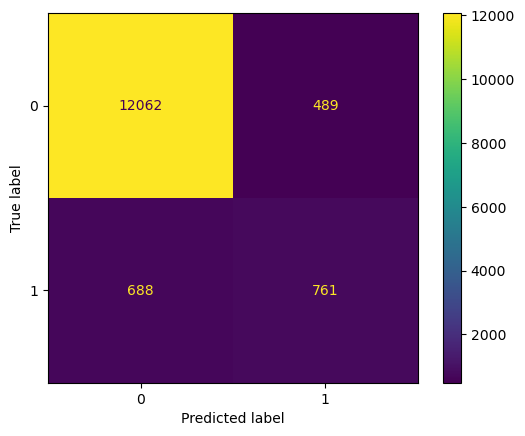

In [243]:
cm3 = confusion_matrix(y_test, y_test_rf2_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=rf_model2.classes_)
disp3.plot()
plt.show()

In [245]:
y_test_rf3_pred = rf_best.predict(test_pca_components)
print(classification_report(y_test, y_test_rf3_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     12551
           1       0.64      0.54      0.58      1449

    accuracy                           0.92     14000
   macro avg       0.79      0.75      0.77     14000
weighted avg       0.92      0.92      0.92     14000



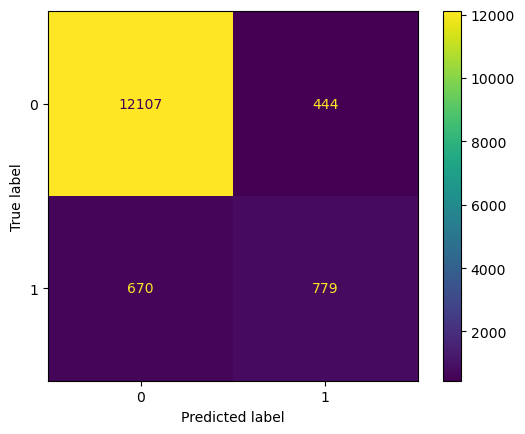

In [247]:
cm4 = confusion_matrix(y_test, y_test_rf3_pred)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=rf_best.classes_)
disp4.plot()
plt.show()

In [249]:
y_test_rf4_pred = rf_best2.predict(X_test_final_scaled)
print(classification_report(y_test, y_test_rf4_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12551
           1       0.71      0.68      0.70      1449

    accuracy                           0.94     14000
   macro avg       0.84      0.82      0.83     14000
weighted avg       0.94      0.94      0.94     14000



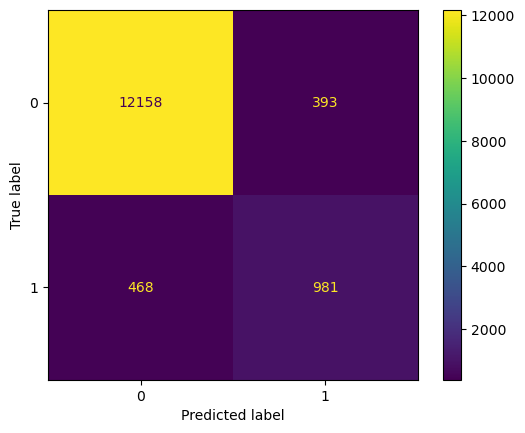

In [251]:
cm5 = confusion_matrix(y_test, y_test_rf4_pred)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                              display_labels=rf_best2.classes_)
disp5.plot()
plt.show()

In [253]:
y_test_lr_tuned = lr_best.predict(test_pca_components)
print(classification_report(y_test, y_test_lr_tuned))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12551
           1       0.54      0.67      0.60      1449

    accuracy                           0.91     14000
   macro avg       0.75      0.80      0.77     14000
weighted avg       0.92      0.91      0.91     14000



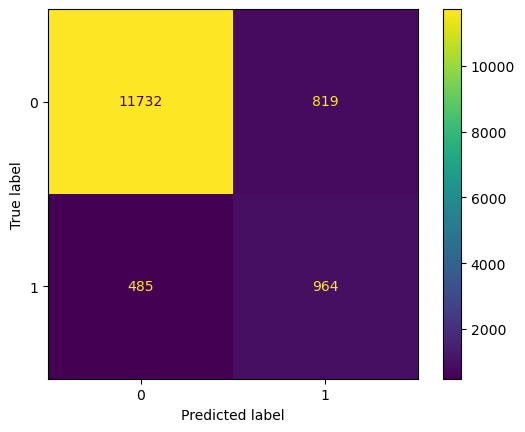

In [255]:
cm6 = confusion_matrix(y_test, y_test_lr_tuned)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6,
                              display_labels=lr_best.classes_)
disp6.plot()
plt.show()

In [257]:
y_test_xgb = xgb_model.predict(X_test_final_scaled)
print(classification_report(y_test, y_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12551
           1       0.73      0.64      0.68      1449

    accuracy                           0.94     14000
   macro avg       0.85      0.80      0.82     14000
weighted avg       0.94      0.94      0.94     14000



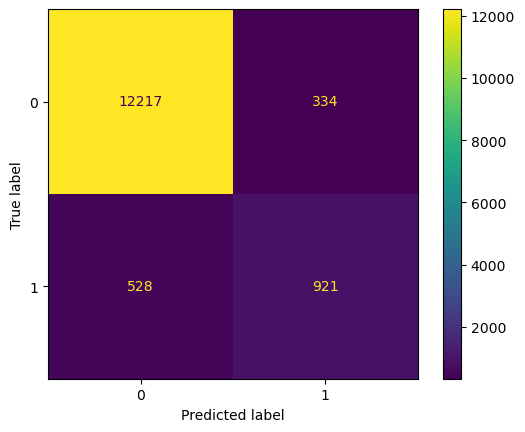

In [259]:
cm7 = confusion_matrix(y_test, y_test_xgb)
disp7 = ConfusionMatrixDisplay(confusion_matrix=cm7,
                              display_labels=xgb_model.classes_)
disp7.plot()
plt.show()

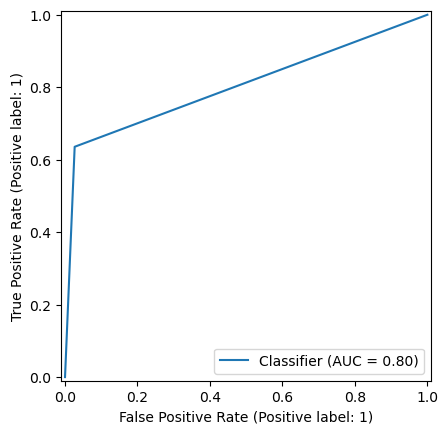

In [261]:
RocCurveDisplay.from_predictions(y_test, y_test_xgb)
plt.show()

In [263]:
X_test_top_30_df = pd.DataFrame(X_test_final_scaled, columns=final_columns)
X_test_refined = X_test_top_30_df[top_features]
X_test_refined_array = np.array(X_test_refined)
y_test_rf30_pred = rf30_model.predict(X_test_refined_array)
print(classification_report(y_test, y_test_rf30_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     12551
           1       0.67      0.71      0.69      1449

    accuracy                           0.93     14000
   macro avg       0.82      0.84      0.83     14000
weighted avg       0.94      0.93      0.93     14000



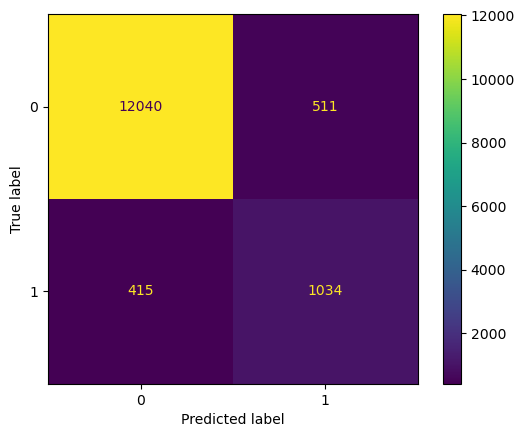

In [265]:
cm8 = confusion_matrix(y_test, y_test_rf30_pred)
disp8 = ConfusionMatrixDisplay(confusion_matrix=cm8,
                              display_labels=rf30_model.classes_)
disp8.plot()
plt.show()

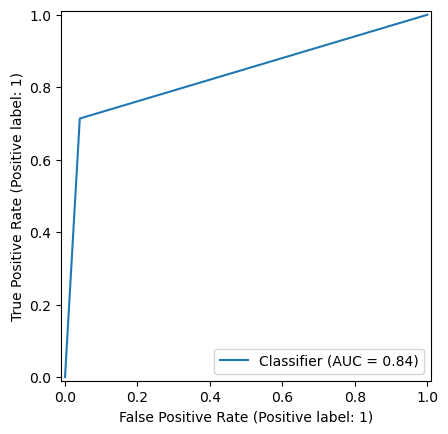

In [267]:
RocCurveDisplay.from_predictions(y_test, y_test_rf30_pred)
plt.show()

In [269]:
y_test_rf30_tuned_pred = rf30_model_tuned.predict(X_test_refined_array)
print(classification_report(y_test, y_test_rf30_tuned_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     12551
           1       0.69      0.70      0.69      1449

    accuracy                           0.94     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.94      0.94      0.94     14000



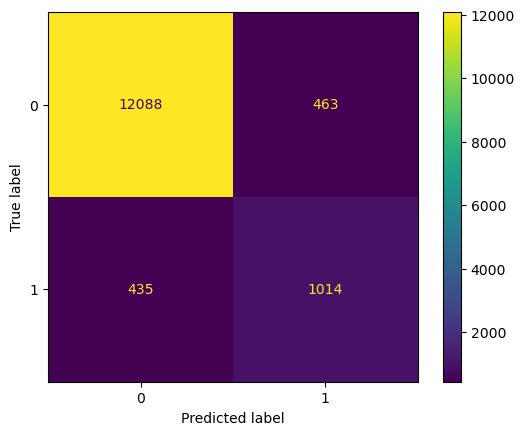

In [271]:
cm9 = confusion_matrix(y_test, y_test_rf30_tuned_pred)
disp9 = ConfusionMatrixDisplay(confusion_matrix=cm9,
                              display_labels=rf30_model_tuned.classes_)
disp9.plot()
plt.show()

In [273]:
y_test_xgb30_tuned_pred = xgb_model_30.predict(X_test_refined_array)
print(classification_report(y_test, y_test_xgb30_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12551
           1       0.72      0.64      0.68      1449

    accuracy                           0.94     14000
   macro avg       0.84      0.81      0.82     14000
weighted avg       0.93      0.94      0.94     14000



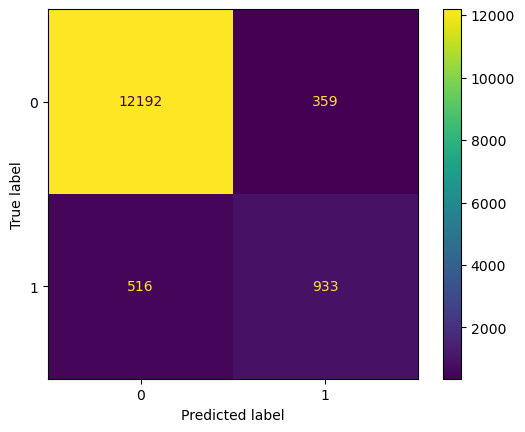

In [275]:
cm10 = confusion_matrix(y_test, y_test_xgb30_tuned_pred)
disp10 = ConfusionMatrixDisplay(confusion_matrix=cm10,
                              display_labels=xgb_model_30.classes_)
disp10.plot()
plt.show()

In [277]:
y_test_svc1_pred = svc_model.predict(X_test_refined_array)
print(classification_report(y_test, y_test_svc1_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     12551
           1       0.57      0.71      0.63      1449

    accuracy                           0.91     14000
   macro avg       0.77      0.82      0.79     14000
weighted avg       0.92      0.91      0.92     14000



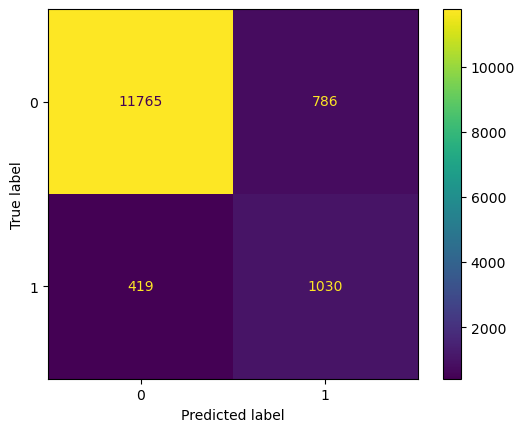

In [279]:
cm11 = confusion_matrix(y_test,y_test_svc1_pred)
disp11 = ConfusionMatrixDisplay(confusion_matrix=cm11,
                              display_labels=svc_model.classes_)
disp11.plot()
plt.show()

In [281]:
submission = unseen.set_index("id")

In [283]:
submission_filtered = submission[new_vars]

In [287]:
submission_filtered = submission[new_vars]
submission_filtered.drop(nonunique_features, axis=1, inplace=True)
submission_filtered[rech_cols] = submission_filtered[rech_cols].apply(lambda x: x.fillna(0))
day_counts(submission_filtered, date_of_last_rech, date_beyond_dataset, 'days_from_last_recharge')
submission_filtered[['days_from_last_recharge']] = submission_filtered[['days_from_last_recharge']].fillna(-1)


submission_filtered[impute_cols] = imp.transform(submission_filtered[impute_cols])


submission_filtered = submission_filtered.apply(outliers, axis=0)


submission_filtered['arpu_diff'] = submission_filtered.arpu_8 - ((submission_filtered.arpu_6 + submission_filtered.arpu_7)/2)

submission_filtered['onnet_mou_diff'] = submission_filtered.onnet_mou_8 - ((submission_filtered.onnet_mou_6 + submission_filtered.onnet_mou_7)/2)

submission_filtered['offnet_mou_diff'] = submission_filtered.offnet_mou_8 - ((submission_filtered.offnet_mou_6 + submission_filtered.offnet_mou_7)/2)

submission_filtered['roam_ic_mou_diff'] = submission_filtered.roam_ic_mou_8 - ((submission_filtered.roam_ic_mou_6 + submission_filtered.roam_ic_mou_7)/2)

submission_filtered['roam_og_mou_diff'] = submission_filtered.roam_og_mou_8 - ((submission_filtered.roam_og_mou_6 + submission_filtered.roam_og_mou_7)/2)

submission_filtered['loc_og_mou_diff'] = submission_filtered.loc_og_mou_8 - ((submission_filtered.loc_og_mou_6 + submission_filtered.loc_og_mou_7)/2)

submission_filtered['std_og_mou_diff'] = submission_filtered.std_og_mou_8 - ((submission_filtered.std_og_mou_6 + submission_filtered.std_og_mou_7)/2)

submission_filtered['isd_og_mou_diff'] = submission_filtered.isd_og_mou_8 - ((submission_filtered.isd_og_mou_6 + submission_filtered.isd_og_mou_7)/2)

submission_filtered['spl_og_mou_diff'] = submission_filtered.spl_og_mou_8 - ((submission_filtered.spl_og_mou_6 + submission_filtered.spl_og_mou_7)/2)

submission_filtered['og_others_diff'] = submission_filtered.og_others_8 - ((submission_filtered.og_others_6 + submission_filtered.og_others_7)/2)

submission_filtered['total_og_mou_diff'] = submission_filtered.total_og_mou_8 - ((submission_filtered.total_og_mou_6 + submission_filtered.total_og_mou_7)/2)

submission_filtered['loc_ic_mou_diff'] = submission_filtered.loc_ic_mou_8 - ((submission_filtered.loc_ic_mou_6 + submission_filtered.loc_ic_mou_7)/2)

submission_filtered['std_ic_mou_diff'] = submission_filtered.std_ic_mou_8 - ((submission_filtered.std_ic_mou_6 + submission_filtered.std_ic_mou_7)/2)

submission_filtered['isd_ic_mou_diff'] = submission_filtered.isd_ic_mou_8 - ((submission_filtered.isd_ic_mou_6 + submission_filtered.isd_ic_mou_7)/2)

submission_filtered['spl_ic_mou_diff'] = submission_filtered.spl_ic_mou_8 - ((submission_filtered.spl_ic_mou_6 + submission_filtered.spl_ic_mou_7)/2)

submission_filtered['ic_others_diff'] = submission_filtered.ic_others_8 - ((submission_filtered.ic_others_6 + submission_filtered.ic_others_7)/2)

submission_filtered['total_ic_mou_diff'] = submission_filtered.total_ic_mou_8 - ((submission_filtered.total_ic_mou_6 + submission_filtered.total_ic_mou_7)/2)

submission_filtered['total_rech_num_diff'] = submission_filtered.total_rech_num_8 - ((submission_filtered.total_rech_num_6 + submission_filtered.total_rech_num_7)/2)

submission_filtered['total_rech_amt_diff'] = submission_filtered.total_rech_amt_8 - ((submission_filtered.total_rech_amt_6 + submission_filtered.total_rech_amt_7)/2)

submission_filtered['max_rech_amt_diff'] = submission_filtered.max_rech_amt_8 - ((submission_filtered.max_rech_amt_6 + submission_filtered.max_rech_amt_7)/2)

submission_filtered['vol_2g_mb_diff'] = submission_filtered.vol_2g_mb_8 - ((submission_filtered.vol_2g_mb_6 + submission_filtered.vol_2g_mb_7)/2)

submission_filtered['vol_3g_mb_diff'] = submission_filtered.vol_3g_mb_8 - ((submission_filtered.vol_3g_mb_6 + submission_filtered.vol_3g_mb_7)/2)

submission_filtered.drop(columns_to_del, axis=1, inplace = True)


submission_final_scaled = scale.transform(submission_filtered)


submission_pca_components = pca2.fit_transform(submission_final_scaled)

In [289]:
submission_top_30_df = pd.DataFrame(submission_final_scaled, columns=final_columns)
submission_refined = submission_top_30_df[top_features]
submission_refined_array = np.array(submission_refined)
unseen['churn_probability'] = rf30_model.predict(submission_refined)

In [291]:
output = unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [293]:
output.to_csv('submission_19_03_2025.csv',index=False)